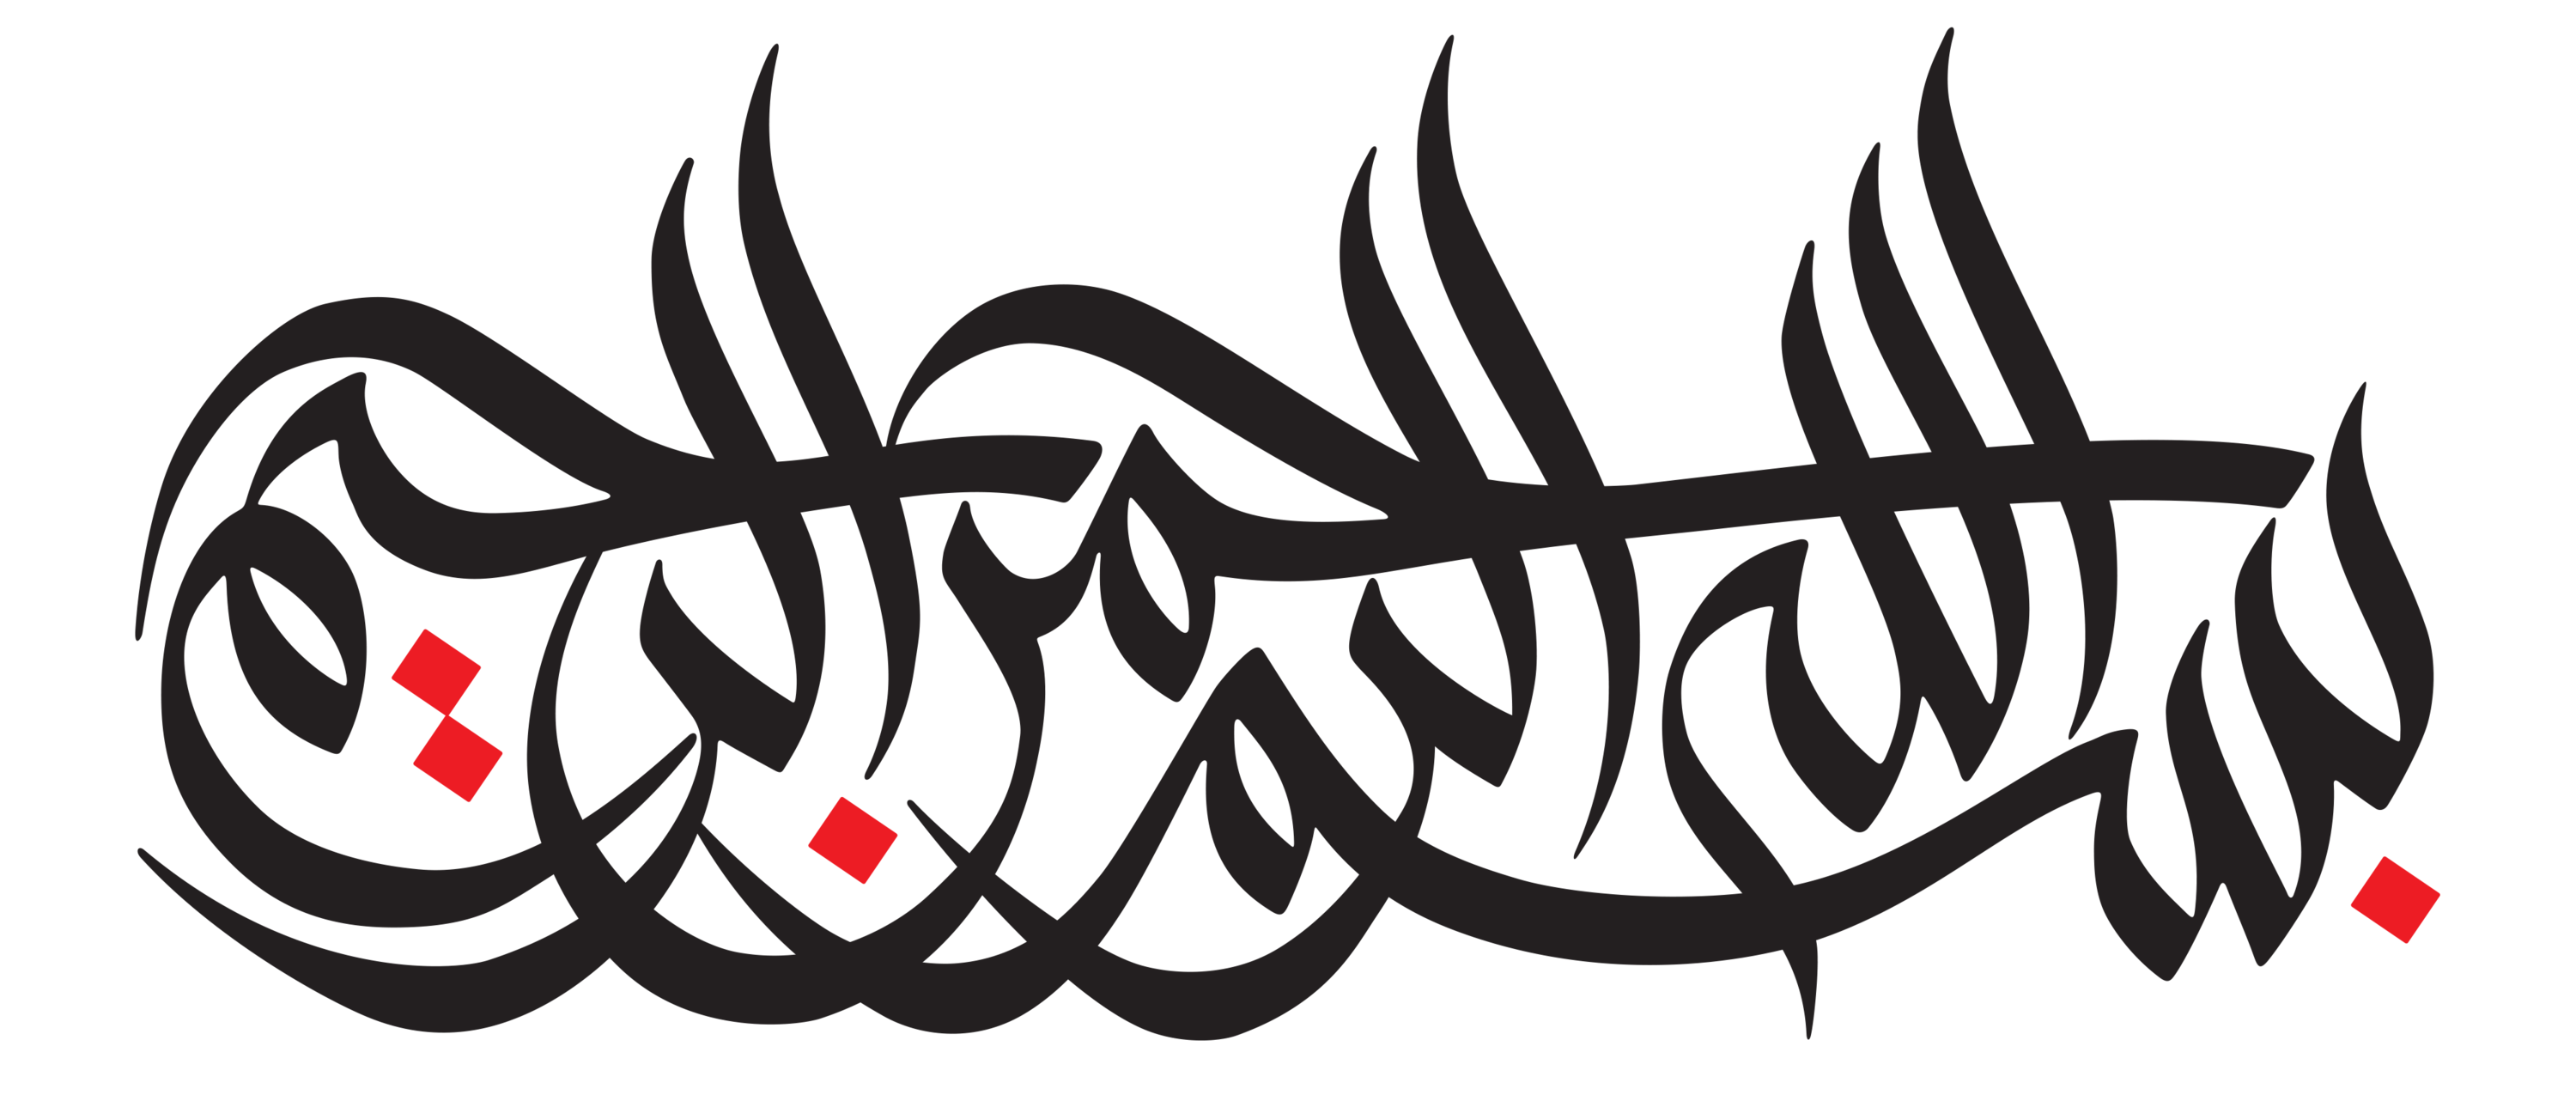

# Context

In this study, we examine air accidents and predict fatality or seriousness of accidents.

**What factors affect the occurrence of air accidents?**

**To what extent are machine learning algorithms used in predicting air accidents?**

## Import Libraries For Overview & EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

## Get The Dataset

In [2]:
data = pd.read_excel('E:\IUST\ترم 8\قابلیت اطمینان انسانی\\Dataset for HRA.xlsx')

## Overview Of The Dataset

In [3]:
data.head()

EventId  Performance-Based Errors  \
0  20060629X00856                         1   
1  20060113X00068                         0   
2  20060929X01431                         1   
3  20070109X00026                         0   
4  20060719X00965                         1   

   Judgment & Decision-Making Errors  Violations  Teamwork  Mental Awareness  \
0                                  0           0         0                 0   
1                                  1           0         0                 0   
2                                  0           0         0                 0   
3                                  0           0         0                 0   
4                                  0           0         0                 0   

   State of Mind  Physical Problems  Sensory Misperception  \
0              0                  0                      0   
1              0                  0                      0   
2              0                  0                      0   
3              0                  0                      0   
4              0                  0                      0   

   Physical Environment  ...  Technology Failure  Acts  Preconditions  \
0                     0  ...                   0     1              0   
1                     0  ...                   0     1              0   
2                     0  ...                   0     1              0   
3                     0  ...                   1     0              0   
4                     0  ...                   0     1              0   

   Supervision  Organization  Fatal or Serious  Flight Segment 1=Taxi  \
0            0             0                 0                      7   
1            0             0                 1                      4   
2            0             0                 0                      7   
3            0             0                 0                      7   
4            0             0                 0                      7   

   91=1/121=0  91= namely general aviation pilots  121 = qualified pilots  
0           1                                 NaN                     NaN  
1           1                                 NaN                     NaN  
2           1                                 NaN                     NaN  
3           1                                 NaN                     NaN  
4           1                                 NaN                     NaN  

[5 rows x 28 columns]

In [4]:
data.tail()

EventId  Performance-Based Errors  \
474  20150717X41748                         0   
475  20151022X65901                         0   
476  20151130X61148                         0   
477  20151213X84149                         0   
478  20150605X52542                         0   

     Judgment & Decision-Making Errors  Violations  Teamwork  \
474                                  0           1         0   
475                                  0           0         0   
476                                  0           0         0   
477                                  0           0         0   
478                                  0           0         0   

     Mental Awareness  State of Mind  Physical Problems  \
474                 0              0                  0   
475                 0              0                  0   
476                 0              0                  0   
477                 0              0                  0   
478                 0              0                  0   

     Sensory Misperception  Physical Environment  ...  Technology Failure  \
474                      0                     0  ...                   0   
475                      0                     0  ...                   0   
476                      0                     1  ...                   0   
477                      0                     1  ...                   0   
478                      0                     0  ...                   1   

     Acts  Preconditions  Supervision  Organization  Fatal or Serious  \
474     1              0            0             0                 1   
475     0              0            0             0                 1   
476     0              1            0             0                 1   
477     0              1            0             0                 1   
478     0              0            1             0                 0   

     Flight Segment 1=Taxi  91=1/121=0  91= namely general aviation pilots  \
474                      5           0                                 NaN   
475                      4           0                                 NaN   
476                      5           0                                 NaN   
477                      5           0                                 NaN   
478                      6           0                                 NaN   

     121 = qualified pilots  
474                     NaN  
475                     NaN  
476                     NaN  
477                     NaN  
478                     NaN  

[5 rows x 28 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EventId                             479 non-null    object 
 1   Performance-Based Errors            479 non-null    int64  
 2   Judgment & Decision-Making Errors   479 non-null    int64  
 3   Violations                          479 non-null    int64  
 4   Teamwork                            479 non-null    int64  
 5   Mental Awareness                    479 non-null    int64  
 6   State of Mind                       479 non-null    int64  
 7   Physical Problems                   479 non-null    int64  
 8   Sensory Misperception               479 non-null    int64  
 9   Physical Environment                479 non-null    int64  
 10  Technological Environment           479 non-null    int64  
 11  Inadequate Supervision              479 non-n

In [6]:
data.describe()

Performance-Based Errors  Judgment & Decision-Making Errors  \
count                479.000000                         479.000000   
mean                   0.480167                           0.127349   
std                    0.500129                           0.333712   
min                    0.000000                           0.000000   
25%                    0.000000                           0.000000   
50%                    0.000000                           0.000000   
75%                    1.000000                           0.000000   
max                    1.000000                           1.000000   

       Violations    Teamwork  Mental Awareness  State of Mind  \
count  479.000000  479.000000        479.000000     479.000000   
mean     0.070981    0.035491          0.016701       0.004175   
std      0.257062    0.185210          0.128284       0.064549   
min      0.000000    0.000000          0.000000       0.000000   
25%      0.000000    0.000000          0.000000       0.000000   
50%      0.000000    0.000000          0.000000       0.000000   
75%      0.000000    0.000000          0.000000       0.000000   
max      1.000000    1.000000          1.000000       1.000000   

       Physical Problems  Sensory Misperception  Physical Environment  \
count         479.000000             479.000000            479.000000   
mean            0.039666               0.018789              0.162839   
std             0.195377               0.135922              0.369605   
min             0.000000               0.000000              0.000000   
25%             0.000000               0.000000              0.000000   
50%             0.000000               0.000000              0.000000   
75%             0.000000               0.000000              0.000000   
max             1.000000               1.000000              1.000000   

       Technological Environment  ...  Technology Failure        Acts  \
count                 479.000000  ...          479.000000  479.000000   
mean                    0.002088  ...            0.319415    0.638831   
std                     0.045691  ...            0.466738    0.480842   
min                     0.000000  ...            0.000000    0.000000   
25%                     0.000000  ...            0.000000    0.000000   
50%                     0.000000  ...            0.000000    1.000000   
75%                     0.000000  ...            1.000000    1.000000   
max                     1.000000  ...            1.000000    1.000000   

       Preconditions  Supervision  Organization  Fatal or Serious  \
count     479.000000   479.000000    479.000000        479.000000   
mean        0.252610     0.045929      0.048017          0.354906   
std         0.434963     0.209550      0.214025          0.478985   
min         0.000000     0.000000      0.000000          0.000000   
25%         0.000000     0.000000      0.000000          0.000000   
50%         0.000000     0.000000      0.000000          0.000000   
75%         1.000000     0.000000      0.000000          1.000000   
max         1.000000     1.000000      1.000000          1.000000   

       Flight Segment 1=Taxi  91=1/121=0  91= namely general aviation pilots  \
count             479.000000  479.000000                                 0.0   
mean                4.951983    0.678497                                 NaN   
std                 2.026960    0.467542                                 NaN   
min                 2.000000    0.000000                                 NaN   
25%                 3.000000    0.000000                                 NaN   
50%                 6.000000    1.000000                                 NaN   
75%                 7.000000    1.000000                                 NaN   
max                 7.000000    1.000000                                 NaN   

       121 = qualified pilots  
count                     0.0  
mean                      NaN  
std                       

# Data Cleaning

## Columns

In [7]:
data.columns

Index(['EventId', 'Performance-Based Errors',
       'Judgment & Decision-Making Errors', 'Violations', 'Teamwork',
       'Mental Awareness', 'State of Mind', 'Physical Problems',
       'Sensory Misperception', 'Physical Environment',
       'Technological Environment', 'Inadequate Supervision',
       'Planned Inappropriate Operations', 'Supervisory Violations',
       'Resource Problems', 'Personnel Selection & Staffing',
       'Climate/ Culture Influences', 'Policy & Process Issues',
       'Technology Failure', 'Acts', 'Preconditions', 'Supervision',
       'Organization', 'Fatal or Serious', 'Flight Segment 1=Taxi',
       '91=1/121=0', '91= namely general aviation pilots',
       '121 = qualified pilots'],
      dtype='object')

### 91= namely general aviation pilots & 121 = qualified pilots

In [8]:
data.drop(['91= namely general aviation pilots','121 = qualified pilots'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   EventId                            479 non-null    object
 1   Performance-Based Errors           479 non-null    int64 
 2   Judgment & Decision-Making Errors  479 non-null    int64 
 3   Violations                         479 non-null    int64 
 4   Teamwork                           479 non-null    int64 
 5   Mental Awareness                   479 non-null    int64 
 6   State of Mind                      479 non-null    int64 
 7   Physical Problems                  479 non-null    int64 
 8   Sensory Misperception              479 non-null    int64 
 9   Physical Environment               479 non-null    int64 
 10  Technological Environment          479 non-null    int64 
 11  Inadequate Supervision             479 non-null    int64 
 12  Planned 

### EventID

In [10]:
data['EventId'].nunique()

477

In [11]:
data[data['EventId'].duplicated()]

EventId  Performance-Based Errors  \
157  20090604X25647                         1   
303  20110518X94643                         1   

     Judgment & Decision-Making Errors  Violations  Teamwork  \
157                                  0           0         0   
303                                  0           0         0   

     Mental Awareness  State of Mind  Physical Problems  \
157                 0              0                  0   
303                 0              0                  0   

     Sensory Misperception  Physical Environment  ...  \
157                      0                     0  ...   
303                      0                     0  ...   

     Climate/ Culture Influences  Policy & Process Issues  Technology Failure  \
157                            0                        0                   0   
303                            0                        0                   0   

     Acts  Preconditions  Supervision  Organization  Fatal or Serious  \
157     1              0            0             0                 0   
303     1              0            0             0                 0   

     Flight Segment 1=Taxi  91=1/121=0  
157                      6           0  
303                      6           0  

[2 rows x 26 columns]

In [12]:
data[data['EventId']=='20090604X25647']

EventId  Performance-Based Errors  \
156  20090604X25647                         1   
157  20090604X25647                         1   

     Judgment & Decision-Making Errors  Violations  Teamwork  \
156                                  0           0         0   
157                                  0           0         0   

     Mental Awareness  State of Mind  Physical Problems  \
156                 0              0                  0   
157                 0              0                  0   

     Sensory Misperception  Physical Environment  ...  \
156                      0                     0  ...   
157                      0                     0  ...   

     Climate/ Culture Influences  Policy & Process Issues  Technology Failure  \
156                            0                        0                   0   
157                            0                        0                   0   

     Acts  Preconditions  Supervision  Organization  Fatal or Serious  \
156     1              0            0             0                 0   
157     1              0            0             0                 0   

     Flight Segment 1=Taxi  91=1/121=0  
156                      6           0  
157                      6           0  

[2 rows x 26 columns]

In [13]:
data.drop(157,axis=0,inplace=True)

In [14]:
data[data['EventId']=='20090604X25647']

EventId  Performance-Based Errors  \
156  20090604X25647                         1   

     Judgment & Decision-Making Errors  Violations  Teamwork  \
156                                  0           0         0   

     Mental Awareness  State of Mind  Physical Problems  \
156                 0              0                  0   

     Sensory Misperception  Physical Environment  ...  \
156                      0                     0  ...   

     Climate/ Culture Influences  Policy & Process Issues  Technology Failure  \
156                            0                        0                   0   

     Acts  Preconditions  Supervision  Organization  Fatal or Serious  \
156     1              0            0             0                 0   

     Flight Segment 1=Taxi  91=1/121=0  
156                      6           0  

[1 rows x 26 columns]

In [15]:
data[data['EventId']=='20110518X94643']

EventId  Performance-Based Errors  \
302  20110518X94643                         1   
303  20110518X94643                         1   

     Judgment & Decision-Making Errors  Violations  Teamwork  \
302                                  0           0         0   
303                                  0           0         0   

     Mental Awareness  State of Mind  Physical Problems  \
302                 0              0                  0   
303                 0              0                  0   

     Sensory Misperception  Physical Environment  ...  \
302                      0                     0  ...   
303                      0                     0  ...   

     Climate/ Culture Influences  Policy & Process Issues  Technology Failure  \
302                            0                        0                   0   
303                            0                        0                   0   

     Acts  Preconditions  Supervision  Organization  Fatal or Serious  \
302     1              0            0             0                 0   
303     1              0            0             0                 0   

     Flight Segment 1=Taxi  91=1/121=0  
302                      2           0  
303                      6           0  

[2 rows x 26 columns]

In [16]:
data.drop(303,axis=0,inplace=True)

In [17]:
data[data['EventId']=='20110518X94643']

EventId  Performance-Based Errors  \
302  20110518X94643                         1   

     Judgment & Decision-Making Errors  Violations  Teamwork  \
302                                  0           0         0   

     Mental Awareness  State of Mind  Physical Problems  \
302                 0              0                  0   

     Sensory Misperception  Physical Environment  ...  \
302                      0                     0  ...   

     Climate/ Culture Influences  Policy & Process Issues  Technology Failure  \
302                            0                        0                   0   

     Acts  Preconditions  Supervision  Organization  Fatal or Serious  \
302     1              0            0             0                 0   

     Flight Segment 1=Taxi  91=1/121=0  
302                      2           0  

[1 rows x 26 columns]

In [18]:
data['EventId'].nunique()

477

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 478
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   EventId                            477 non-null    object
 1   Performance-Based Errors           477 non-null    int64 
 2   Judgment & Decision-Making Errors  477 non-null    int64 
 3   Violations                         477 non-null    int64 
 4   Teamwork                           477 non-null    int64 
 5   Mental Awareness                   477 non-null    int64 
 6   State of Mind                      477 non-null    int64 
 7   Physical Problems                  477 non-null    int64 
 8   Sensory Misperception              477 non-null    int64 
 9   Physical Environment               477 non-null    int64 
 10  Technological Environment          477 non-null    int64 
 11  Inadequate Supervision             477 non-null    int64 
 12  Planned 

<AxesSubplot:>

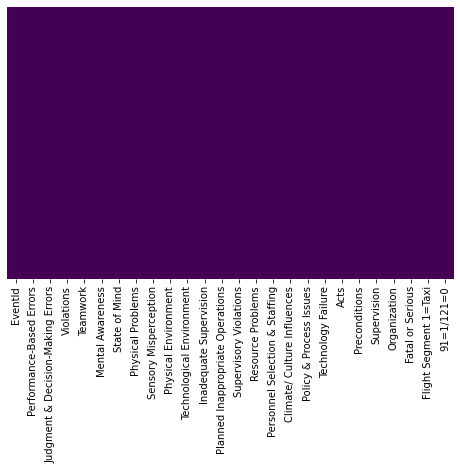

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(data=data.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [21]:
data.isnull().sum()

EventId                              0
Performance-Based Errors             0
Judgment & Decision-Making Errors    0
Violations                           0
Teamwork                             0
Mental Awareness                     0
State of Mind                        0
Physical Problems                    0
Sensory Misperception                0
Physical Environment                 0
Technological Environment            0
Inadequate Supervision               0
Planned Inappropriate Operations     0
Supervisory Violations               0
Resource Problems                    0
Personnel Selection & Staffing       0
Climate/ Culture Influences          0
Policy & Process Issues              0
Technology Failure                   0
Acts                                 0
Preconditions                        0
Supervision                          0
Organization                         0
Fatal or Serious                     0
Flight Segment 1=Taxi                0
91=1/121=0               

### Performance-Based Errors

In [22]:
data['Performance-Based Errors'].value_counts()

0    249
1    228
Name: Performance-Based Errors, dtype: int64

### Judgment & Decision-Making Errors

In [23]:
data['Judgment & Decision-Making Errors'].value_counts()

0    416
1     61
Name: Judgment & Decision-Making Errors, dtype: int64

### Violations

In [24]:
data['Violations'].value_counts()

0    443
1     34
Name: Violations, dtype: int64

### Teamwork

In [25]:
data['Teamwork'].value_counts()

0    460
1     17
Name: Teamwork, dtype: int64

### Mental Awareness

In [26]:
data['Mental Awareness'].value_counts()

0    469
1      8
Name: Mental Awareness, dtype: int64

### State of Mind

In [27]:
data['State of Mind'].value_counts()

0    475
1      2
Name: State of Mind, dtype: int64

### Physical Problems

In [28]:
data['Physical Problems'].value_counts()

0    458
1     19
Name: Physical Problems, dtype: int64

### Sensory Misperception

In [29]:
data['Sensory Misperception'].value_counts()

0    468
1      9
Name: Sensory Misperception, dtype: int64

### Physical Environment

In [30]:
data['Physical Environment'].value_counts()

0    399
1     78
Name: Physical Environment, dtype: int64

### Technological Environment

In [31]:
data['Technological Environment'].value_counts()

0    476
1      1
Name: Technological Environment, dtype: int64

### Inadequate Supervision

In [32]:
data['Inadequate Supervision'].value_counts()

0    456
1     21
Name: Inadequate Supervision, dtype: int64

### Planned Inappropriate Operations

In [33]:
data['Planned Inappropriate Operations'].value_counts()

0    476
1      1
Name: Planned Inappropriate Operations, dtype: int64

### Supervisory Violations

In [34]:
data['Supervisory Violations'].value_counts()

0    477
Name: Supervisory Violations, dtype: int64

### Resource Problems

In [35]:
data['Resource Problems'].value_counts()

0    470
1      7
Name: Resource Problems, dtype: int64

### Personnel Selection & Staffing

In [36]:
data['Personnel Selection & Staffing'].value_counts()

0    477
Name: Personnel Selection & Staffing, dtype: int64

### Climate/ Culture Influences

In [37]:
data['Climate/ Culture Influences'].value_counts()

0    477
Name: Climate/ Culture Influences, dtype: int64

### Policy & Process Issues

In [38]:
data['Policy & Process Issues'].value_counts()

0    461
1     16
Name: Policy & Process Issues, dtype: int64

### Technology Failure

In [39]:
data['Technology Failure'].value_counts()

0    324
1    153
Name: Technology Failure, dtype: int64

### Acts

In [40]:
data['Acts'].value_counts()

1    304
0    173
Name: Acts, dtype: int64

### Preconditions

In [41]:
data['Preconditions'].value_counts()

0    356
1    121
Name: Preconditions, dtype: int64

### Supervision

In [42]:
data['Supervision'].value_counts()

0    455
1     22
Name: Supervision, dtype: int64

### Organization

In [43]:
data['Organization'].value_counts()

0    454
1     23
Name: Organization, dtype: int64

### Fatal or Serious

In [44]:
data['Fatal or Serious'].value_counts()

0    307
1    170
Name: Fatal or Serious, dtype: int64

### Flight Segment 1=Taxi

In [45]:
data['Flight Segment 1=Taxi'].value_counts()

7    170
2    115
6     81
5     43
4     35
3     33
Name: Flight Segment 1=Taxi, dtype: int64

### 91=1/121=0

In [46]:
data['91=1/121=0'].value_counts()

1    325
0    152
Name: 91=1/121=0, dtype: int64

## Drop Non-Important Columns

In [47]:
data.head()

EventId  Performance-Based Errors  \
0  20060629X00856                         1   
1  20060113X00068                         0   
2  20060929X01431                         1   
3  20070109X00026                         0   
4  20060719X00965                         1   

   Judgment & Decision-Making Errors  Violations  Teamwork  Mental Awareness  \
0                                  0           0         0                 0   
1                                  1           0         0                 0   
2                                  0           0         0                 0   
3                                  0           0         0                 0   
4                                  0           0         0                 0   

   State of Mind  Physical Problems  Sensory Misperception  \
0              0                  0                      0   
1              0                  0                      0   
2              0                  0                      0   
3              0                  0                      0   
4              0                  0                      0   

   Physical Environment  ...  Climate/ Culture Influences  \
0                     0  ...                            0   
1                     0  ...                            0   
2                     0  ...                            0   
3                     0  ...                            0   
4                     0  ...                            0   

   Policy & Process Issues  Technology Failure  Acts  Preconditions  \
0                        0                   0     1              0   
1                        0                   0     1              0   
2                        0                   0     1              0   
3                        0                   1     0              0   
4                        0                   0     1              0   

   Supervision  Organization  Fatal or Serious  Flight Segment 1=Taxi  \
0            0             0                 0                      7   
1            0             0                 1                      4   
2            0             0                 0                      7   
3            0             0                 0                      7   
4            0             0                 0                      7   

   91=1/121=0  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 26 columns]

In [48]:
data.drop(['EventId','Teamwork' , 'Mental Awareness' , 'State of Mind' , 'Physical Problems' , 'Sensory Misperception' ,
           'Technological Environment' , 'Planned Inappropriate Operations' , 'Supervisory Violations' , 
           'Resource Problems' , 'Personnel Selection & Staffing' , 'Climate/ Culture Influences' , 'Policy & Process Issues'],
         axis=1,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 478
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Performance-Based Errors           477 non-null    int64
 1   Judgment & Decision-Making Errors  477 non-null    int64
 2   Violations                         477 non-null    int64
 3   Physical Environment               477 non-null    int64
 4   Inadequate Supervision             477 non-null    int64
 5   Technology Failure                 477 non-null    int64
 6   Acts                               477 non-null    int64
 7   Preconditions                      477 non-null    int64
 8   Supervision                        477 non-null    int64
 9   Organization                       477 non-null    int64
 10  Fatal or Serious                   477 non-null    int64
 11  Flight Segment 1=Taxi              477 non-null    int64
 12  91=1/121=0            

# EDA: Exploratory Data Analysis

In [50]:
data.head()

Performance-Based Errors  Judgment & Decision-Making Errors  Violations  \
0                         1                                  0           0   
1                         0                                  1           0   
2                         1                                  0           0   
3                         0                                  0           0   
4                         1                                  0           0   

   Physical Environment  Inadequate Supervision  Technology Failure  Acts  \
0                     0                       0                   0     1   
1                     0                       0                   0     1   
2                     0                       0                   0     1   
3                     0                       0                   1     0   
4                     0                       0                   0     1   

   Preconditions  Supervision  Organization  Fatal or Serious  \
0              0            0             0                 0   
1              0            0             0                 1   
2              0            0             0                 0   
3              0            0             0                 0   
4              0            0             0                 0   

   Flight Segment 1=Taxi  91=1/121=0  
0                      7           1  
1                      4           1  
2                      7           1  
3                      7           1  
4                      7           1

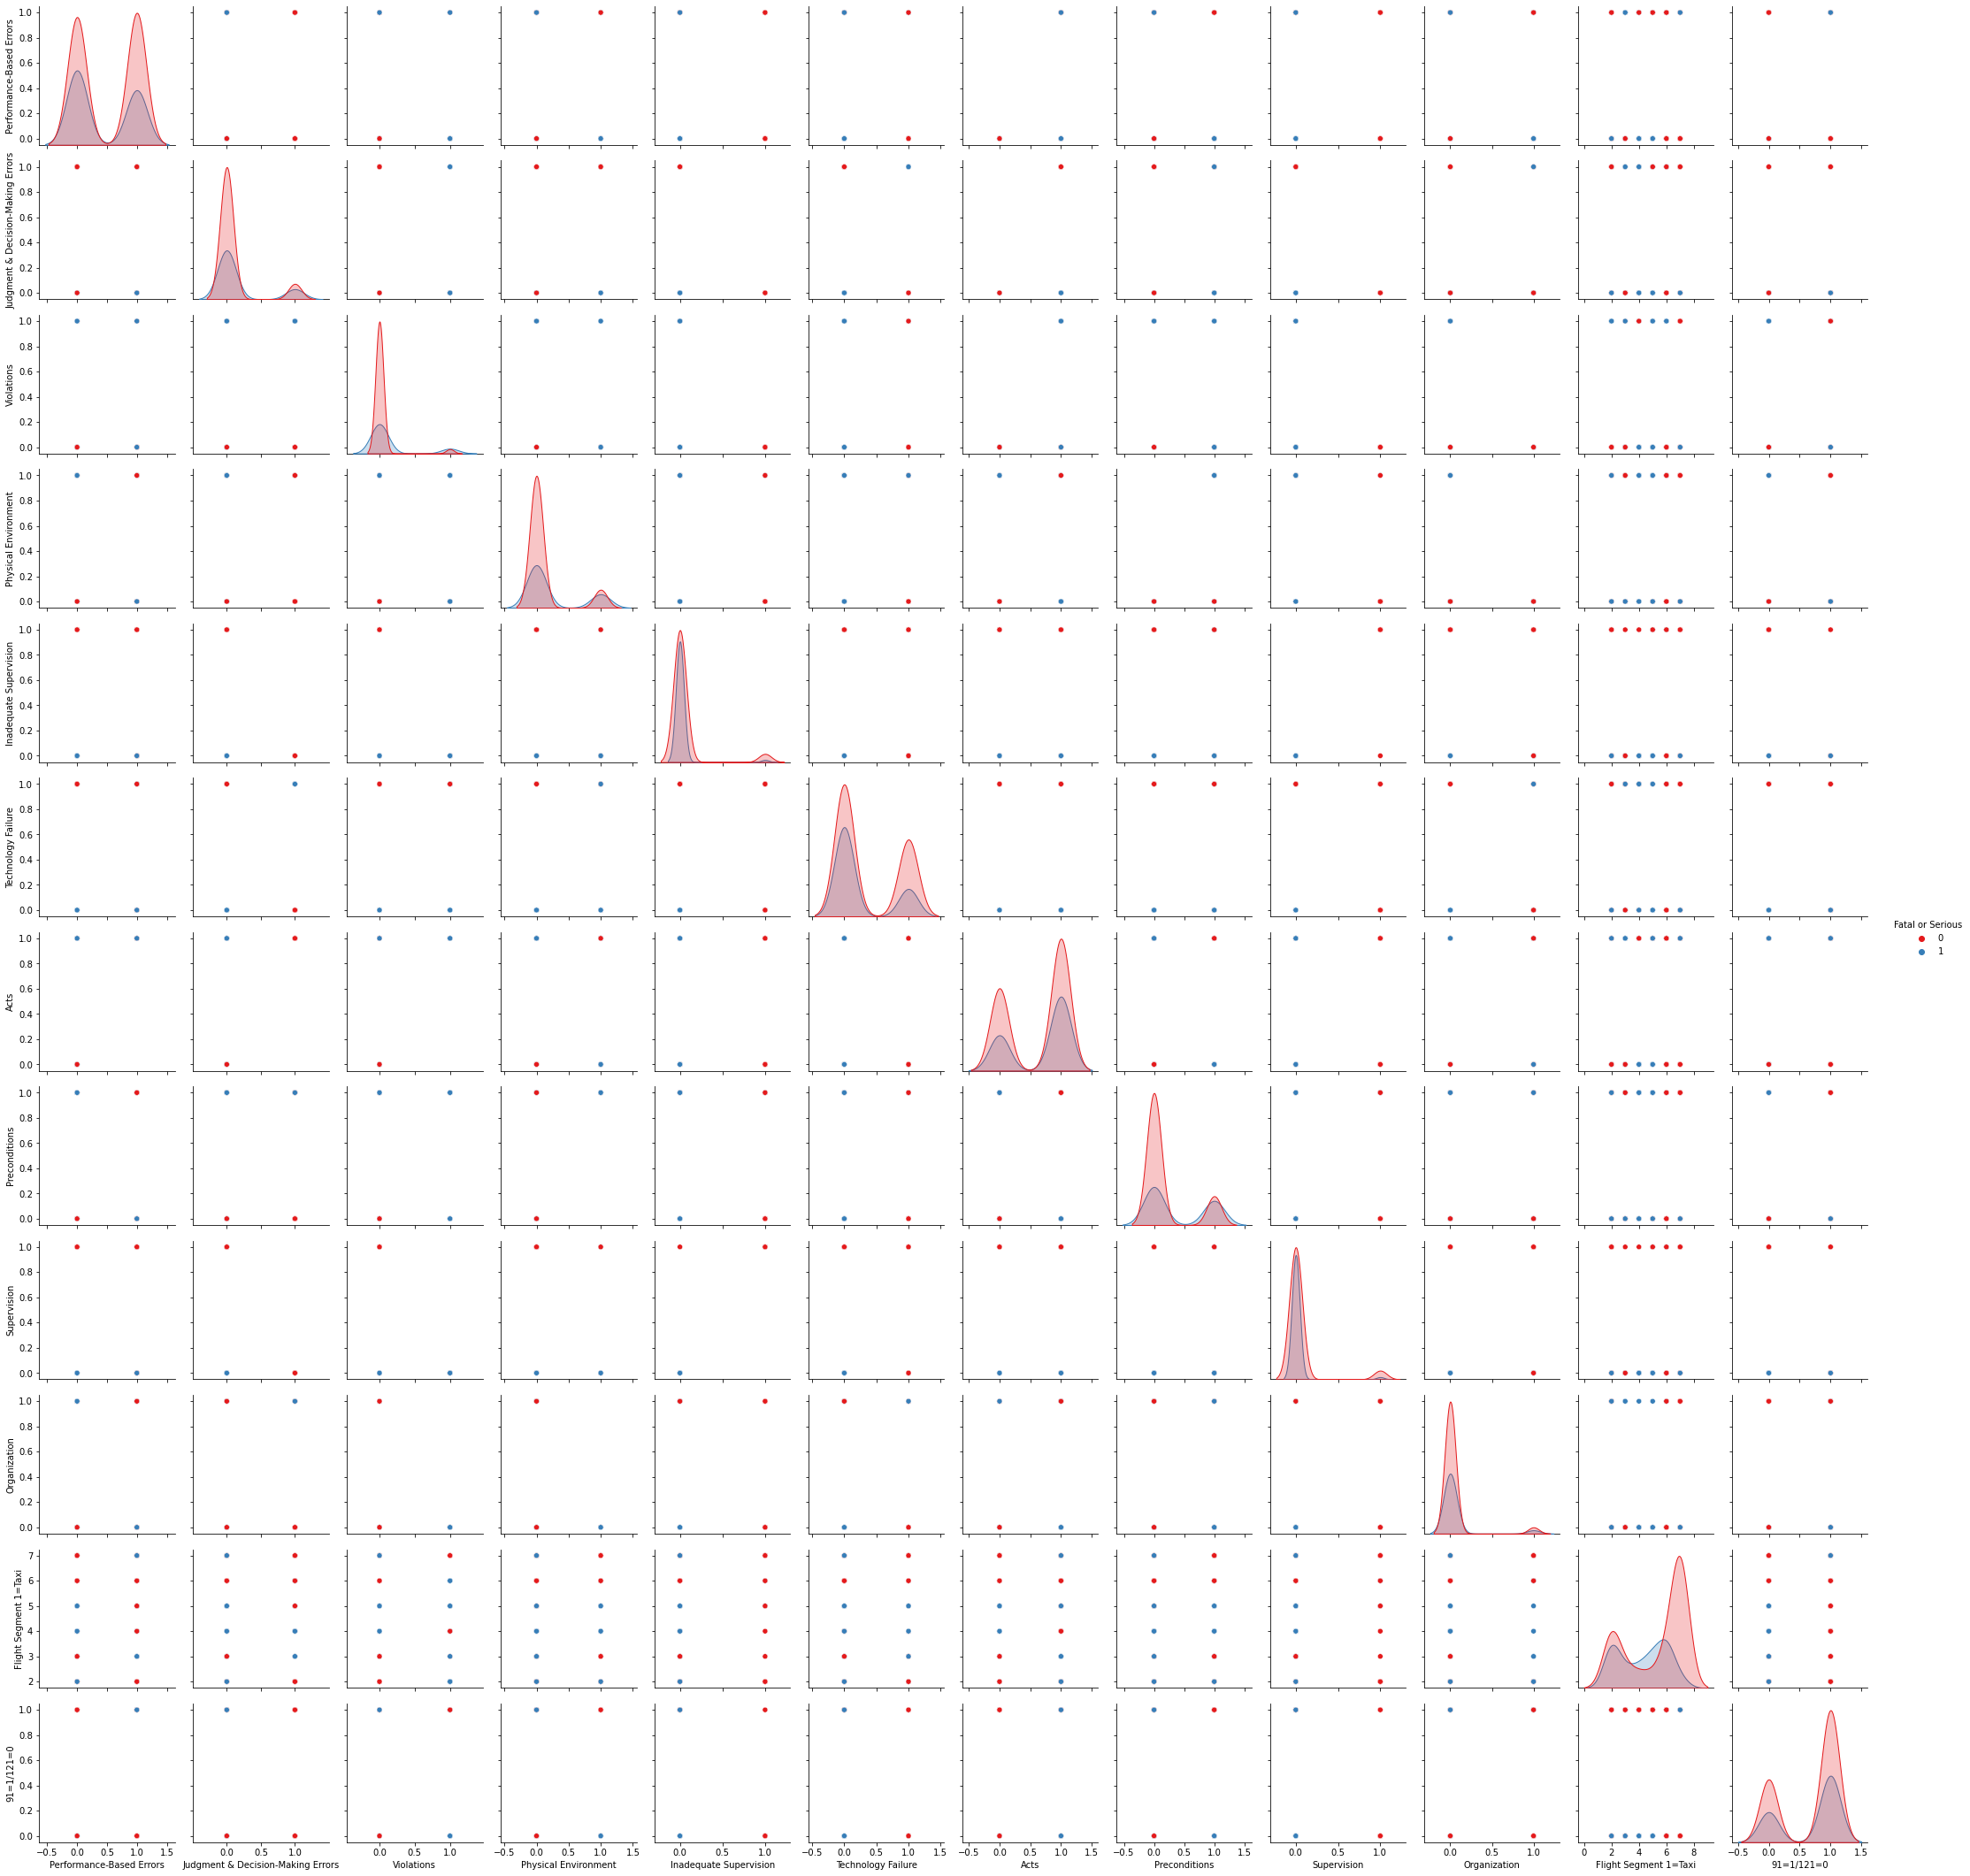

In [51]:
sns.pairplot(data , hue='Fatal or Serious', palette='Set1')

<AxesSubplot:>

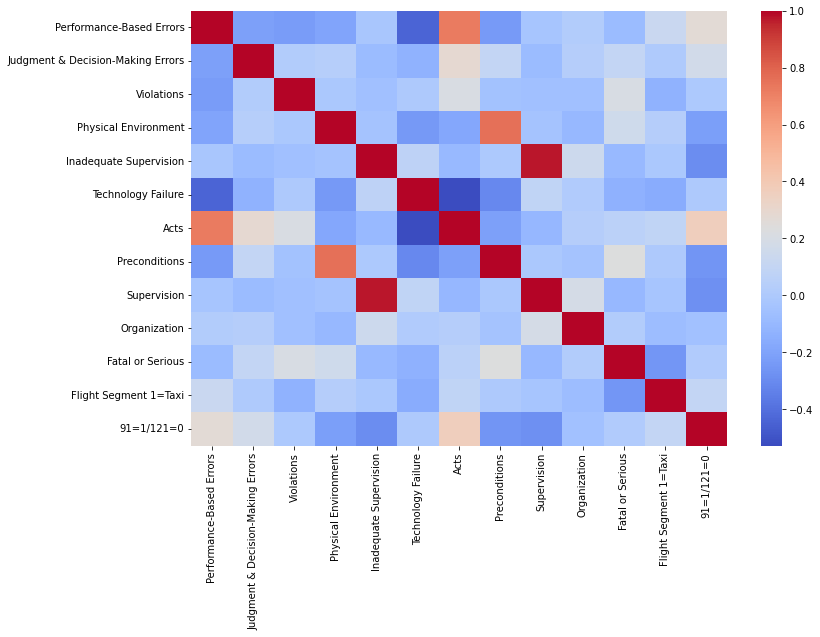

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='coolwarm')

## Auto EDA with Sweetviz

                                             |                                             | [  0%]   00:00 ->…


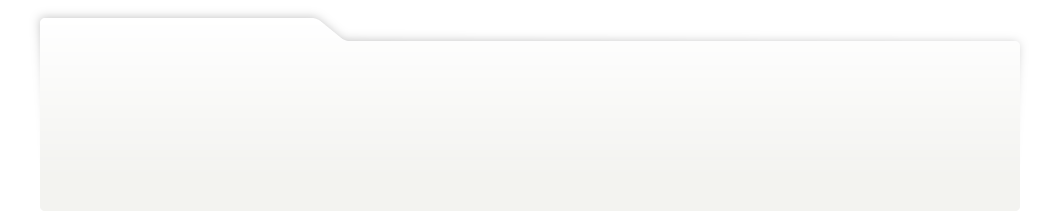
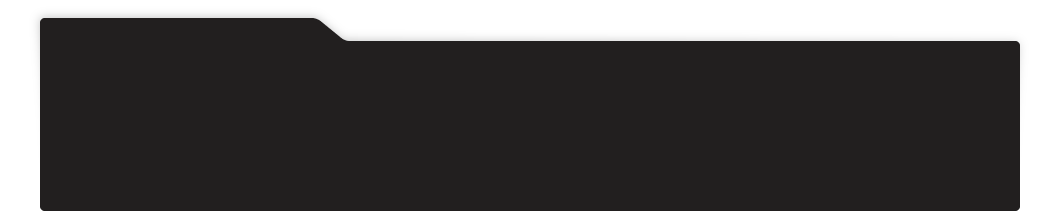
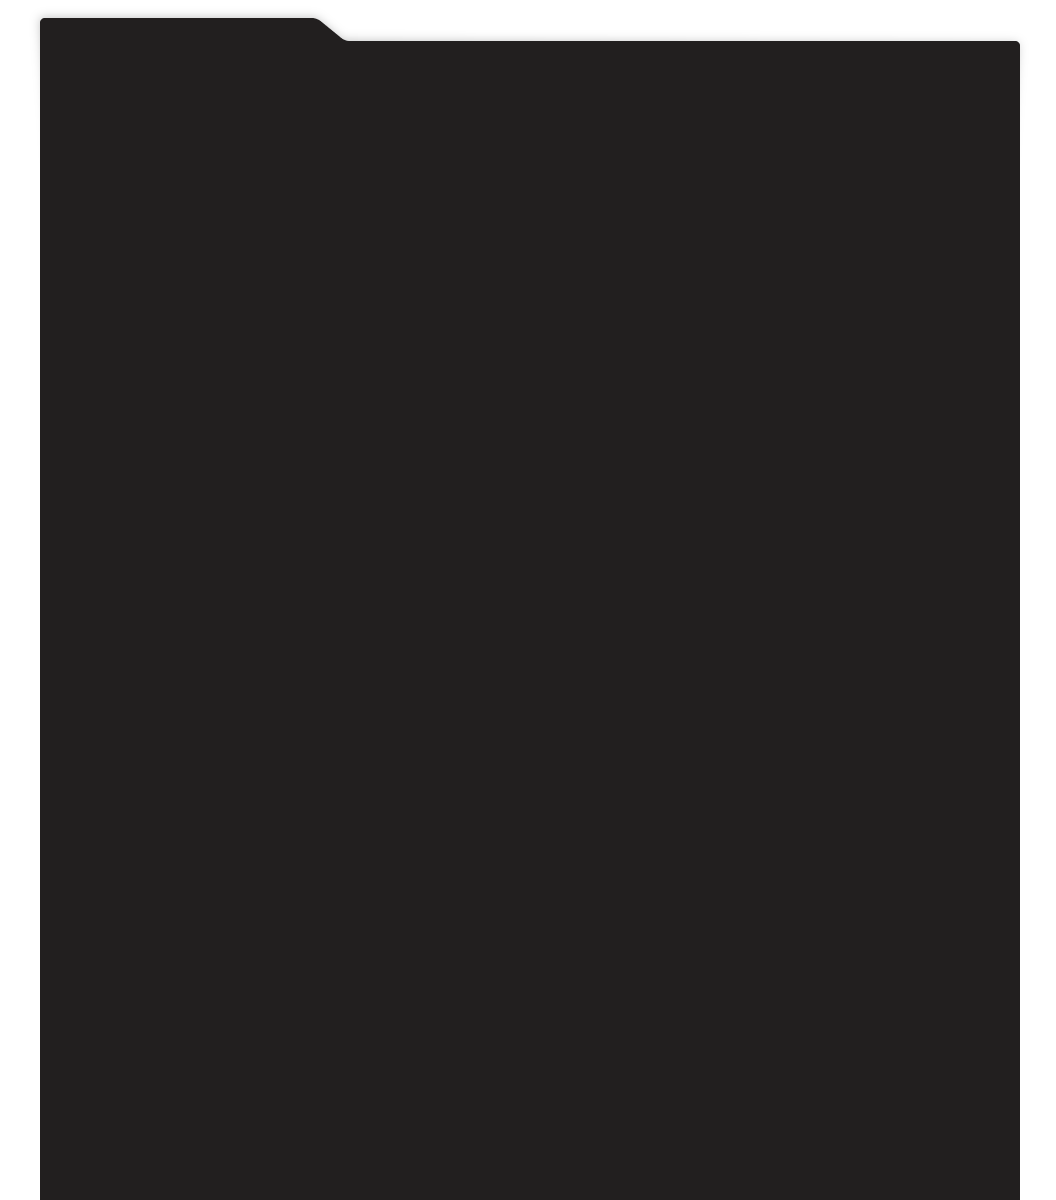
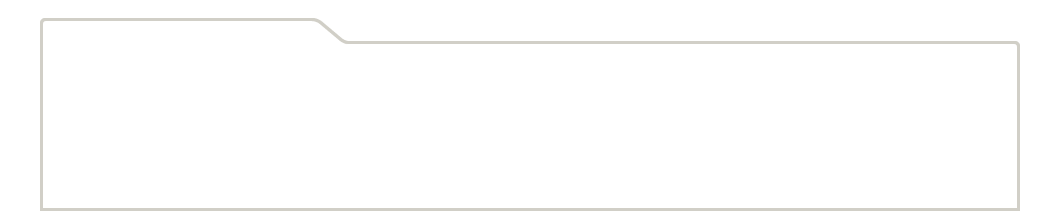
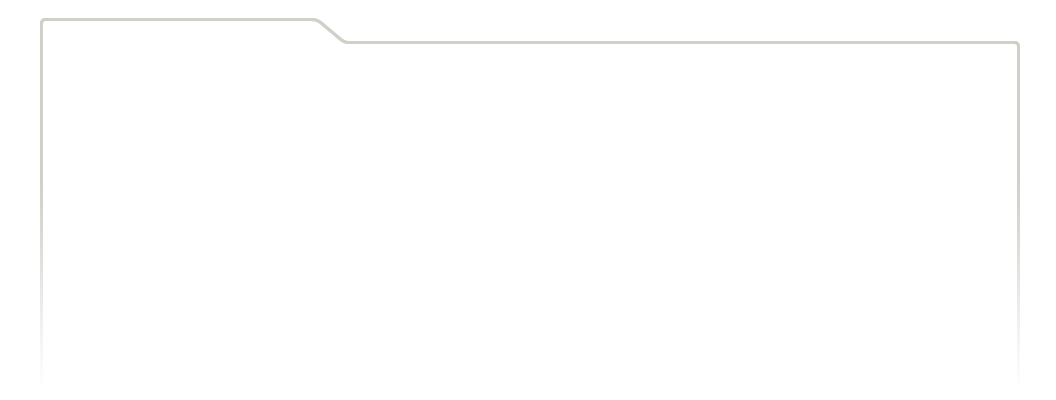
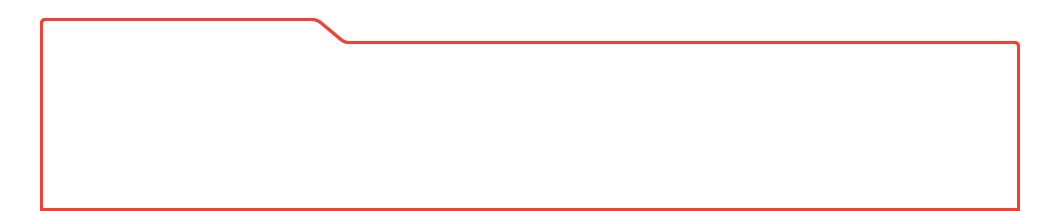
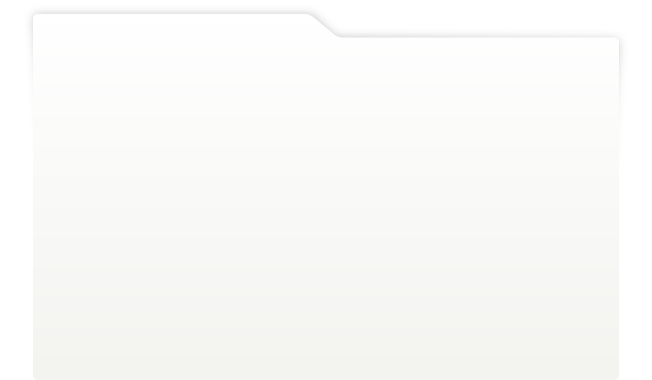
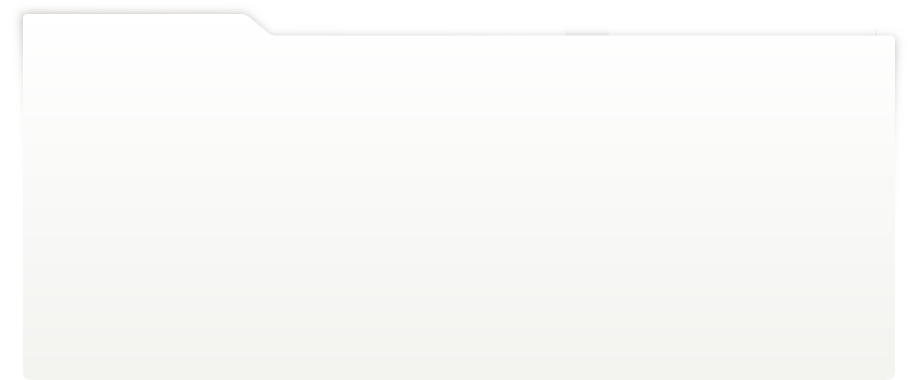
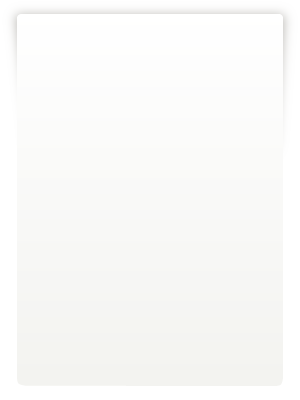
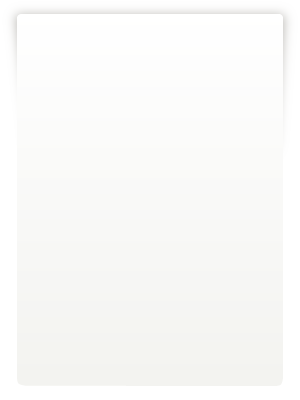
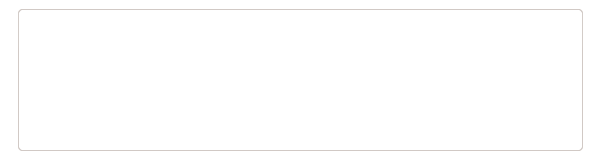
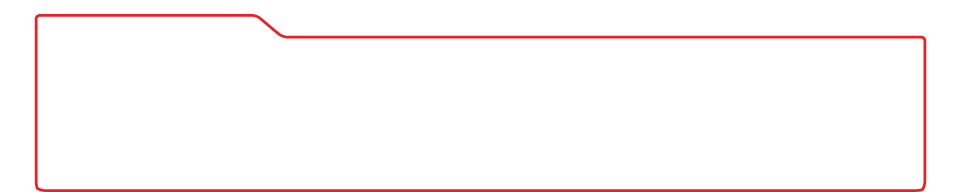
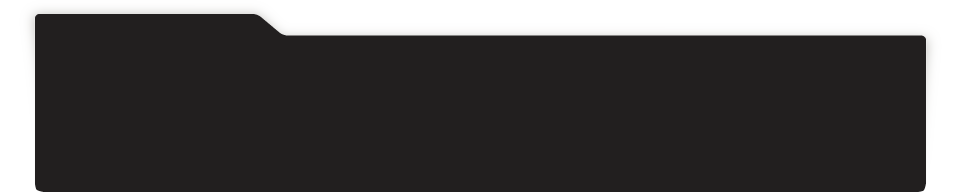
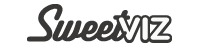
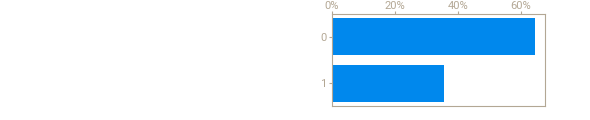
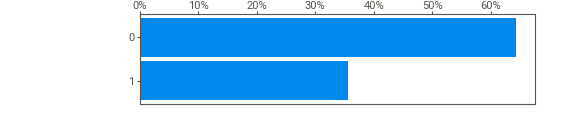
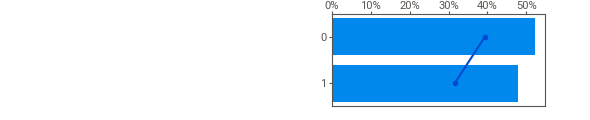
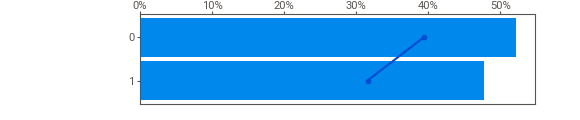
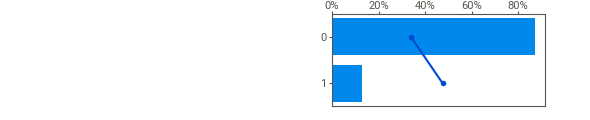
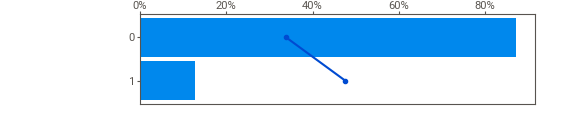
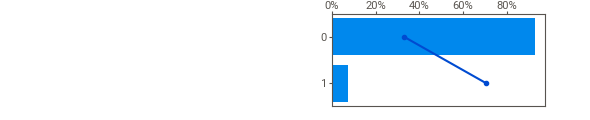
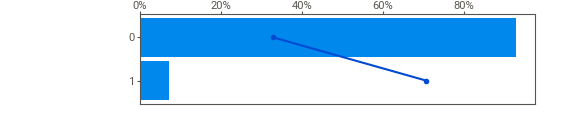
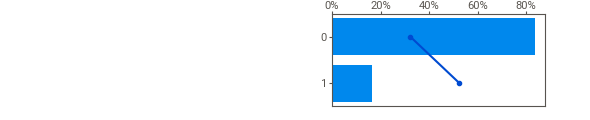
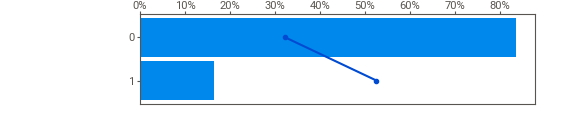
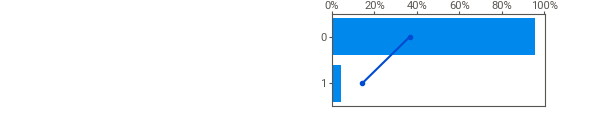
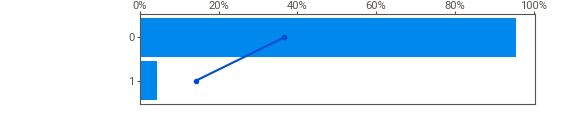
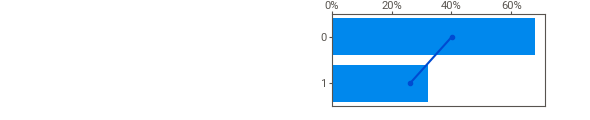
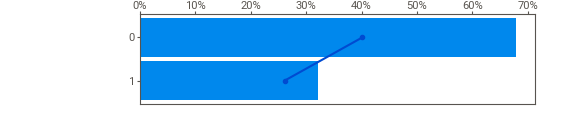
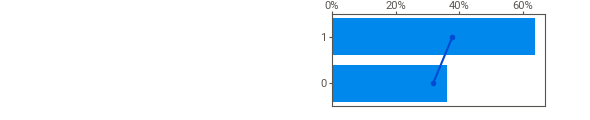
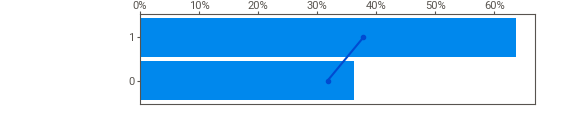
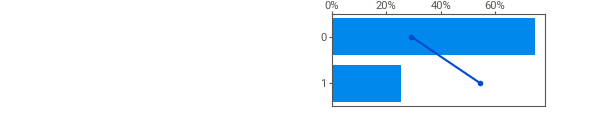
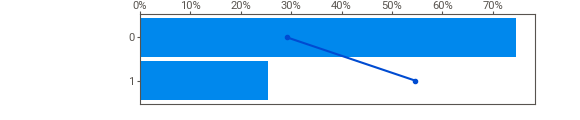
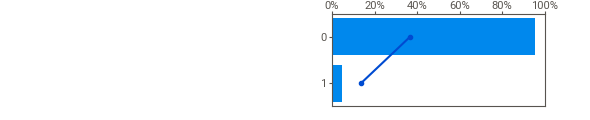
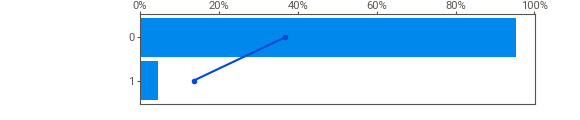
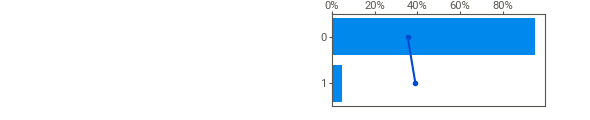
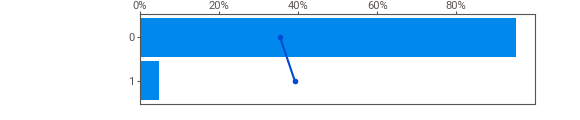
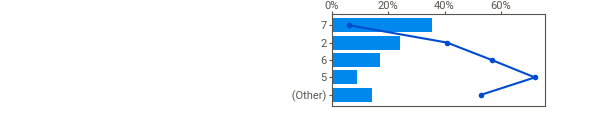
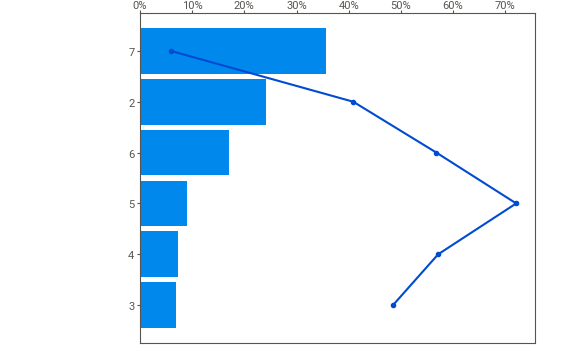
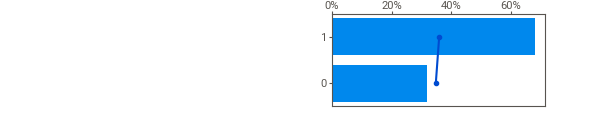
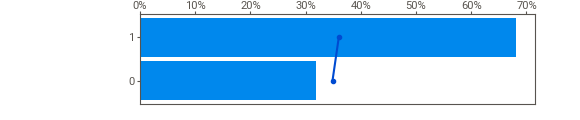
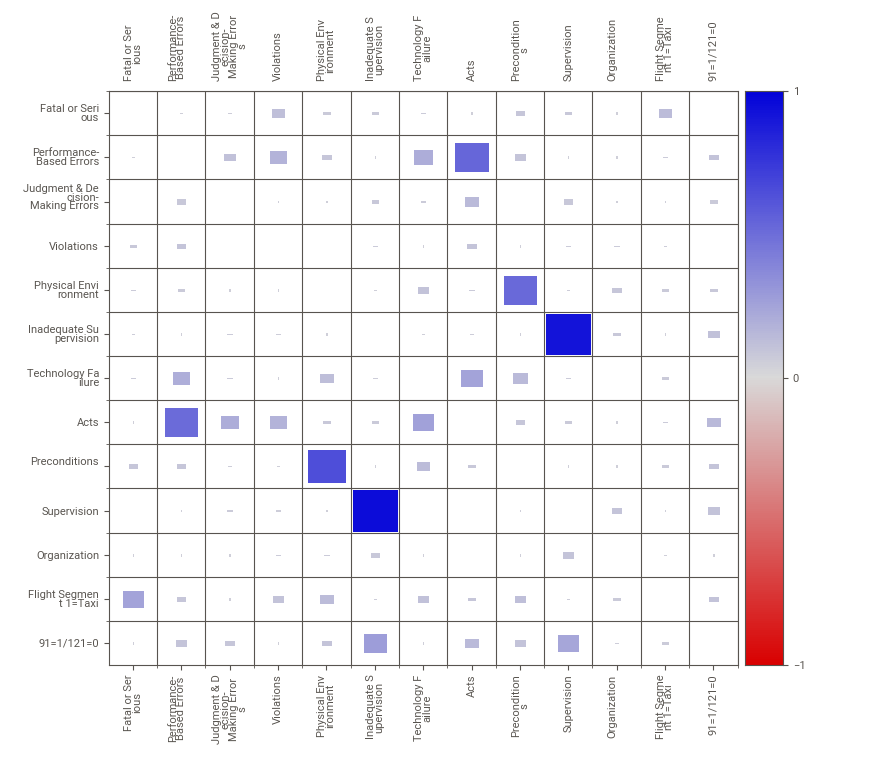
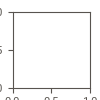

In [53]:
#analyzing the dataset
advert_report = sv.analyze([data,'Accident'],target_feat='Fatal or Serious',pairwise_analysis="on")
#display the report
advert_report.show_notebook(w='100%')

                                             |                                             | [  0%]   00:00 ->…


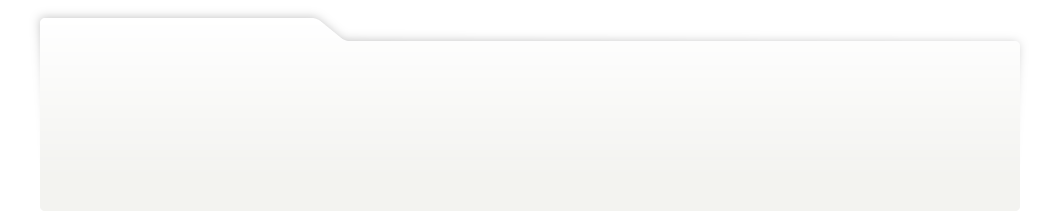
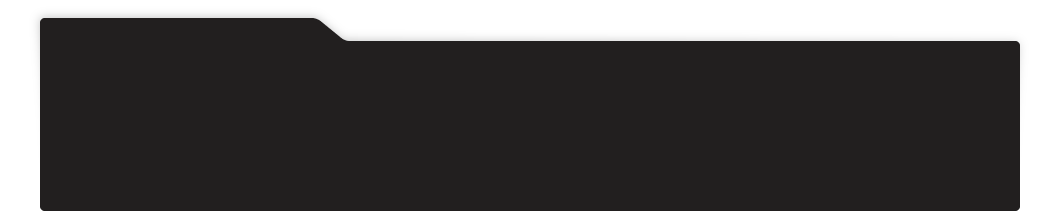
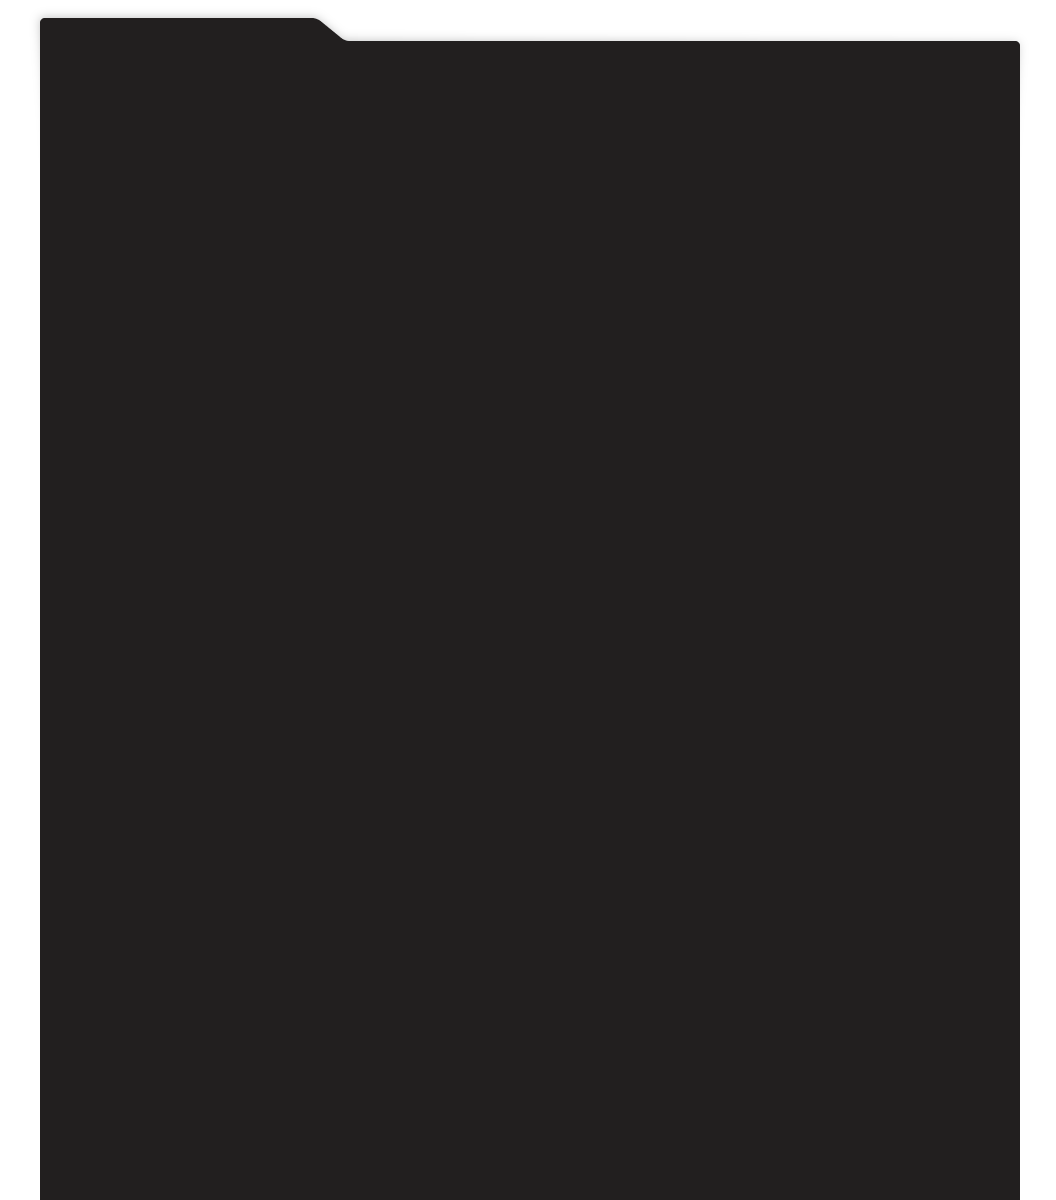
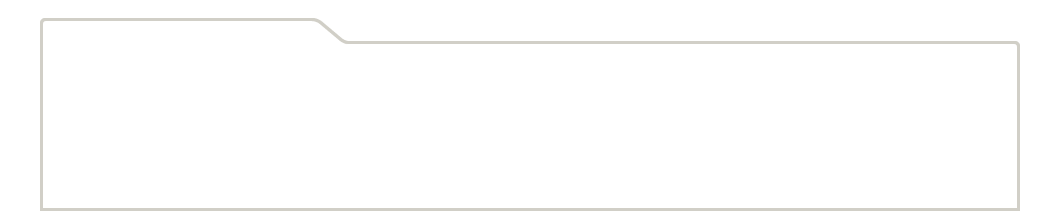
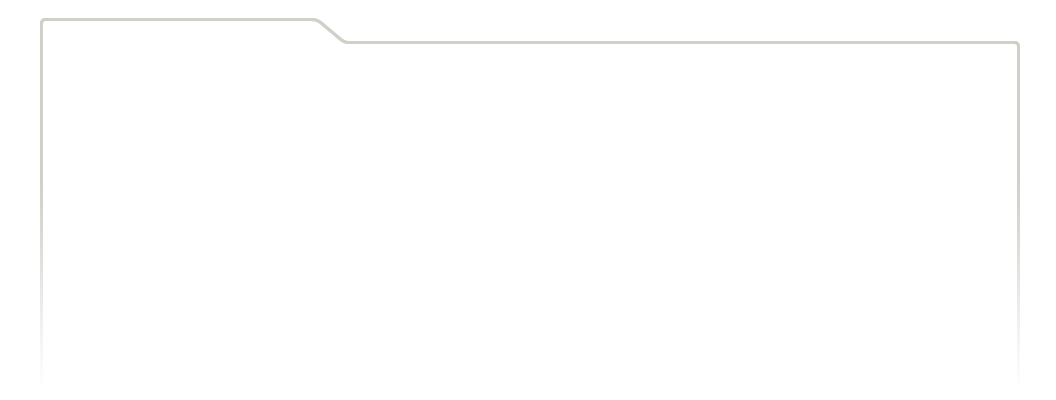
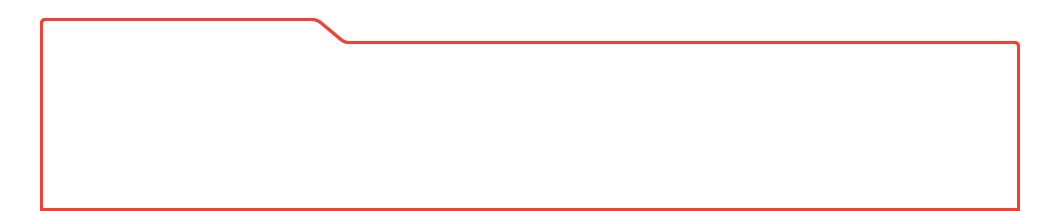
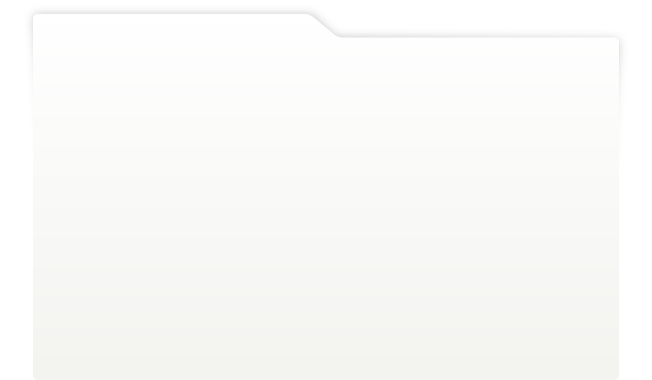
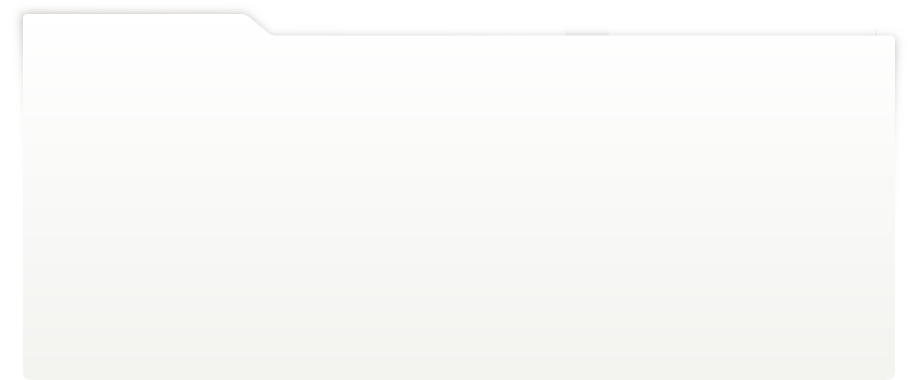
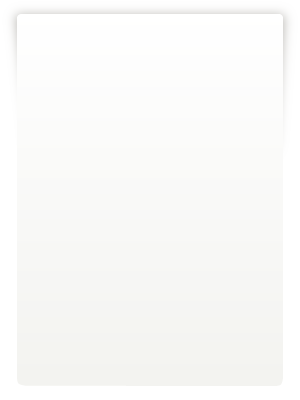
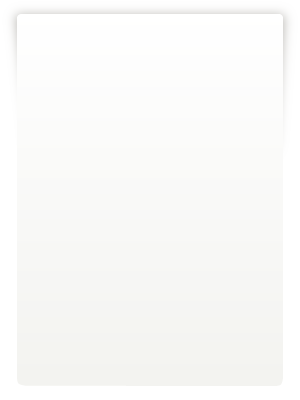
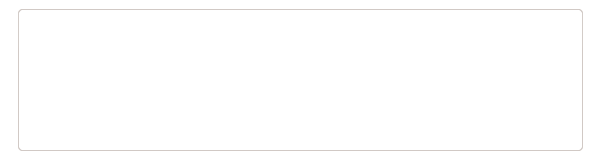
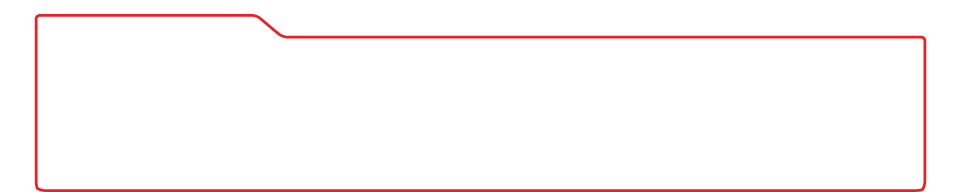
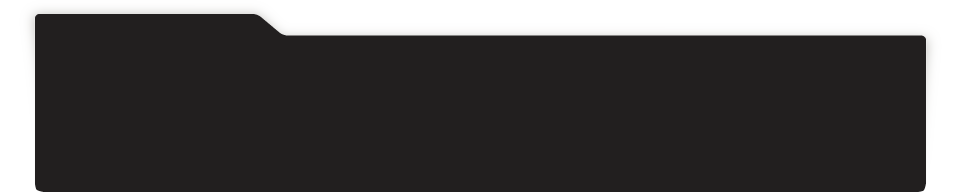
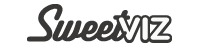
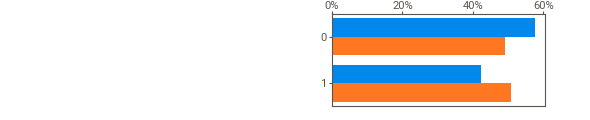
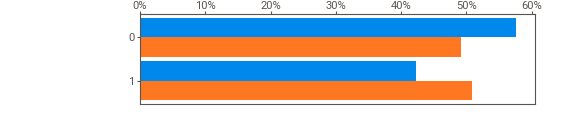
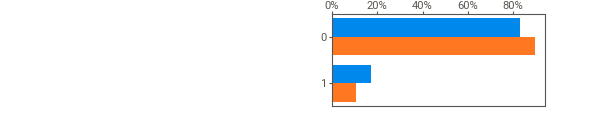
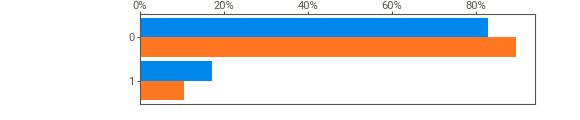
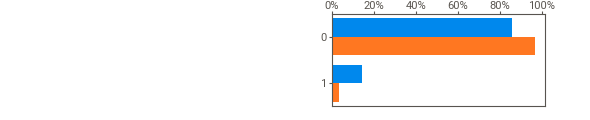
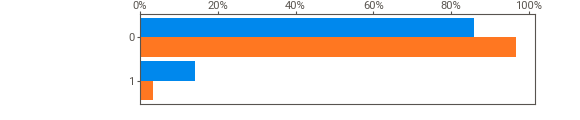
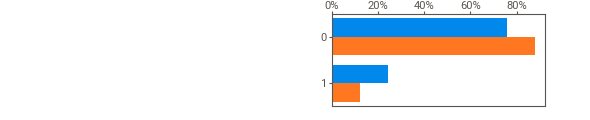
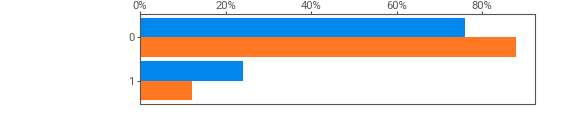
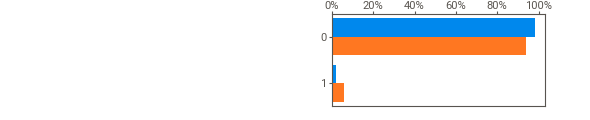
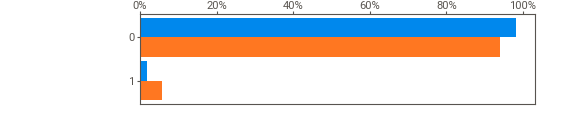
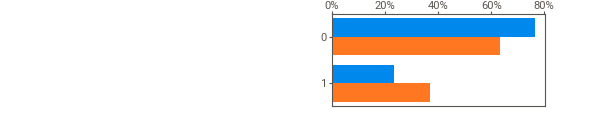
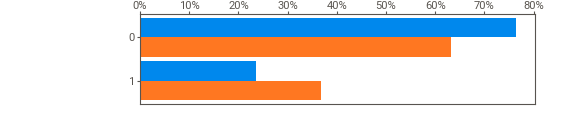
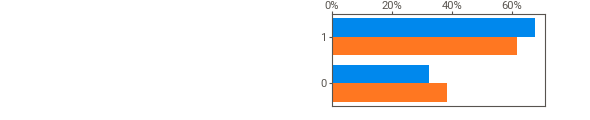
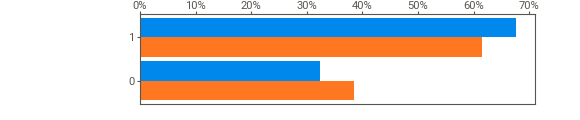
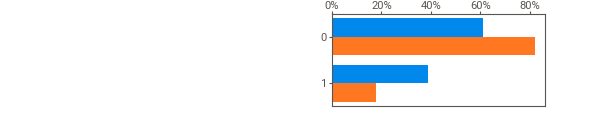
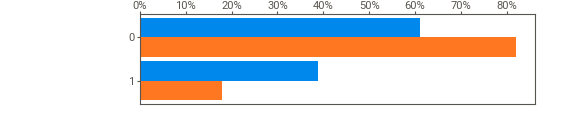
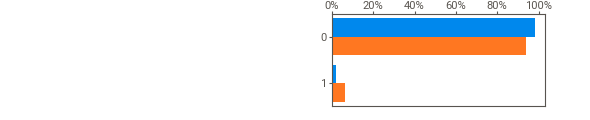
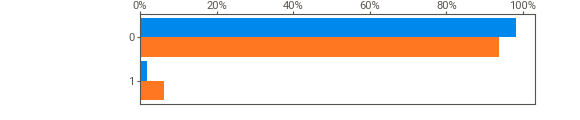
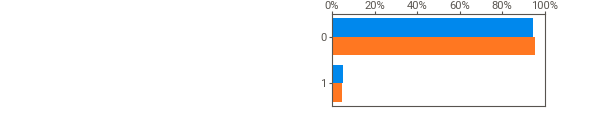
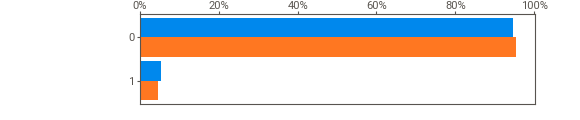
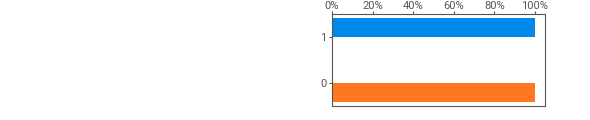
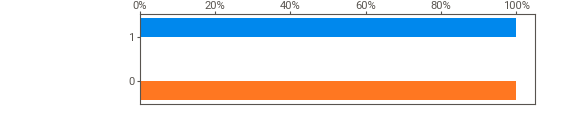
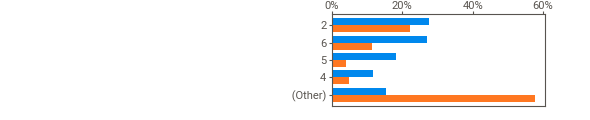
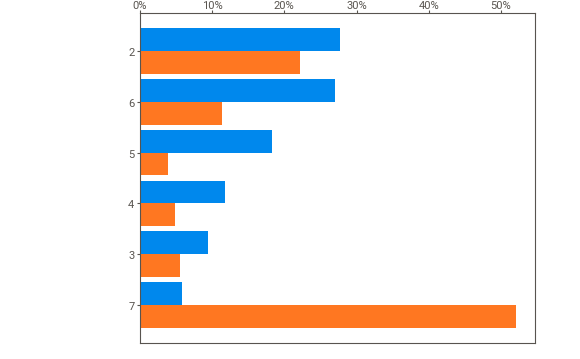
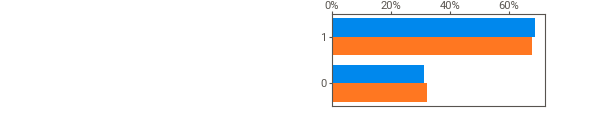
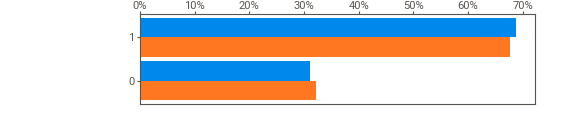
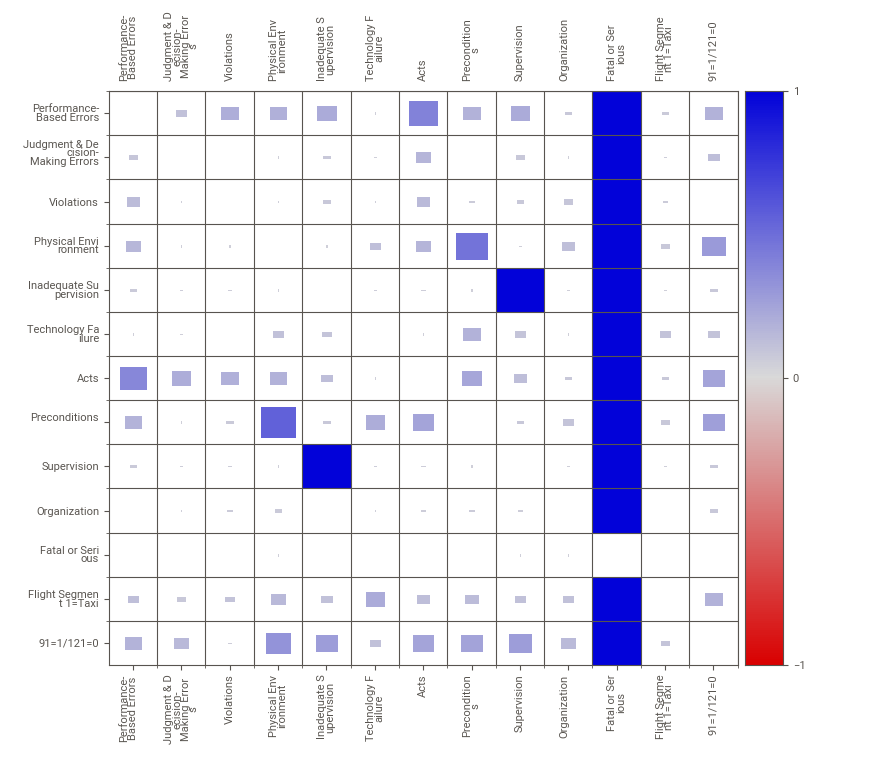
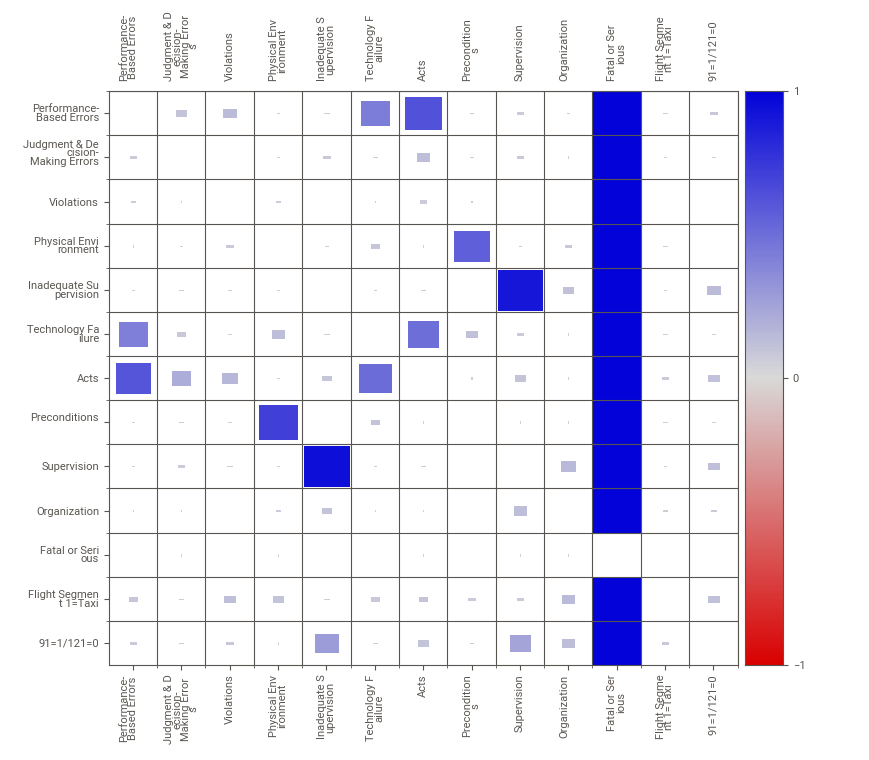

In [54]:
my_report = sv.compare_intra(data, data['Fatal or Serious'] ==1, ["Fatal", "Serious"])
my_report.show_notebook(w='100%')

# Train Valid Test Split

**Train Dataset:**

Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model

**Valid Dataset:**

Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.
Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.

**Test Dataset:**

Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.

In [55]:
from fast_ml.model_development import train_valid_test_split

In [56]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'Fatal or Serious', 
                                                                            train_size=0.7, valid_size=0.1, test_size=0.2,
                                                                           random_state=101)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(333, 12)
(333,)
(48, 12)
(48,)
(96, 12)
(96,)


(None, None)

In [57]:
X_train

Performance-Based Errors  Judgment & Decision-Making Errors  Violations  \
429                         0                                  0           0   
333                         1                                  0           0   
109                         0                                  0           0   
93                          0                                  0           0   
229                         1                                  0           0   
..                        ...                                ...         ...   
63                          0                                  1           0   
328                         1                                  0           0   
339                         0                                  0           1   
11                          0                                  0           0   
353                         0                                  0           0   

     Physical Environment  Inadequate Supervision  Technology Failure  Acts  \
429                     0                       0                   1     0   
333                     0                       0                   0     1   
109                     0                       0                   1     0   
93                      1                       1                   0     0   
229                     0                       0                   0     1   
..                    ...                     ...                 ...   ...   
63                      1                       0                   0     1   
328                     0                       0                   0     1   
339                     0                       0                   0     1   
11                      0                       0                   1     0   
353                     1                       0                   0     0   

     Preconditions  Supervision  Organization  Flight Segment 1=Taxi  \
429              0            0             0                      2   
333              0            0             0                      6   
109              0            0             0                      2   
93               1            1             0                      5   
229              0            0             0                      6   
..             ...          ...           ...                    ...   
63               1            0             0                      7   
328              0            0             0                      5   
339              0            0             0                      7   
11               0            0             0                      7   
353              1            0             0                      5   

     91=1/121=0  
429           1  
333           1  
109           1  
93            0  
229           0  
..          ...  
63            1  
328           1  
339           1  
11            1  
353           0  

[333 rows x 12 columns]

In [58]:
y_train

429    1
333    1
109    0
93     0
229    0
      ..
63     1
328    0
339    0
11     0
353    0
Name: Fatal or Serious, Length: 333, dtype: int64

In [59]:
X_valid

Performance-Based Errors  Judgment & Decision-Making Errors  Violations  \
114                         0                                  0           1   
440                         1                                  0           0   
143                         0                                  0           0   
226                         1                                  0           0   
268                         0                                  0           1   
278                         0                                  0           0   
138                         0                                  0           0   
31                          0                                  0           0   
91                          0                                  0           0   
406                         0                                  0           0   
100                         1                                  0           0   
128                         1                                  0           0   
315                         1                                  0           0   
104                         1                                  0           0   
212                         0                                  0           0   
169                         0                                  0           0   
190                         1                                  0           0   
260                         0                                  0           0   
438                         1                                  1           0   
391                         0                                  0           0   
418                         0                                  0           0   
133                         1                                  0           0   
317                         0                                  0           1   
334                         0                                  0           1   
117                         0                                  0           0   
238                         1                                  0           0   
454                         0                                  0           0   
213                         1                                  0           0   
130                         1                                  0           0   
346                         1                                  0           0   
349                         0                                  0           0   
180                         1                                  0           0   
210                         0                                  0           0   
419                         0                                  0           0   
17                          0                                  1           0   
184                         0                                  0           0   
351                         0                                  0           0   
478                         0                                  0           0   
408                         1                                  0           0   
13                          1                                  0           0   
211                         0                                  0           0   
38                          1                                  0           0   
72                          1                                  0           0   
2                           1                                  0           0   
387                         0                                  0           0   
179                         1                                  0           0   
308                         0                                  0           0   
412                         1                                  0           0   

     Physical Environment  Inadequate Supervision  Technology Failure  Acts  \
114  

In [60]:
y_valid

114    1
440    0
143    1
226    0
268    0
278    0
138    0
31     0
91     0
406    0
100    1
128    0
315    1
104    1
212    0
169    1
190    1
260    0
438    0
391    0
418    1
133    0
317    0
334    1
117    0
238    0
454    1
213    0
130    0
346    0
349    0
180    0
210    0
419    0
17     1
184    1
351    0
478    0
408    1
13     0
211    1
38     1
72     1
2      0
387    0
179    0
308    1
412    0
Name: Fatal or Serious, dtype: int64

In [61]:
X_test

Performance-Based Errors  Judgment & Decision-Making Errors  Violations  \
455                         1                                  0           0   
399                         1                                  0           0   
166                         1                                  0           0   
188                         1                                  0           0   
53                          0                                  0           0   
..                        ...                                ...         ...   
4                           1                                  0           0   
234                         0                                  0           0   
8                           1                                  0           0   
468                         1                                  0           0   
335                         0                                  1           0   

     Physical Environment  Inadequate Supervision  Technology Failure  Acts  \
455                     0                       0                   0     1   
399                     0                       0                   0     1   
166                     0                       0                   0     1   
188                     1                       0                   0     1   
53                      0                       0                   1     0   
..                    ...                     ...                 ...   ...   
4                       0                       0                   0     1   
234                     0                       0                   0     0   
8                       1                       0                   0     1   
468                     0                       0                   0     1   
335                     0                       0                   1     1   

     Preconditions  Supervision  Organization  Flight Segment 1=Taxi  \
455              0            0             0                      7   
399              0            0             0                      7   
166              0            0             1                      6   
188              1            0             0                      7   
53               0            0             0                      7   
..             ...          ...           ...                    ...   
4                0            0             0                      7   
234              1            0             0                      5   
8                1            0             0                      2   
468              0            0             0                      7   
335              0            0             0                      2   

     91=1/121=0  
455           0  
399           1  
166           1  
188           1  
53            0  
..          ...  
4             1  
234           0  
8             1  
468           1  
335           1  

[96 rows x 12 columns]

In [62]:
y_test

455    0
399    0
166    1
188    0
53     0
      ..
4      0
234    0
8      0
468    0
335    1
Name: Fatal or Serious, Length: 96, dtype: int64

## Imbalance Dataset

In [63]:
X_train_imbalance = X_train.copy()

In [64]:
y_train_imbalance = y_train.copy()

## Balance Train Dataset

In [65]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [66]:
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
counter = Counter(y_train)
counter

Counter({1: 206, 0: 206})

# Predictions

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression(random_state=101)

In [69]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=101)

In [70]:
pred = lr.predict(X_test)

In [71]:
print('Score:\n',lr.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred))

Score:
 0.7395833333333334 

Confusion Matrix:
 [[53 17]
 [ 8 18]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        70
           1       0.51      0.69      0.59        26

    accuracy                           0.74        96
   macro avg       0.69      0.72      0.70        96
weighted avg       0.77      0.74      0.75        96



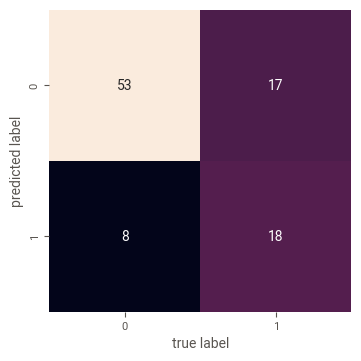

In [72]:
mat_T = confusion_matrix(y_test,pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [73]:
df_eval = pd.DataFrame({'Label':y_test,
                        'Prediction': pred})
df_eval

Label  Prediction
455      0           0
399      0           0
166      1           0
188      0           1
53       0           0
..     ...         ...
4        0           0
234      0           1
8        0           1
468      0           0
335      1           1

[96 rows x 2 columns]

## K Nearest Neighbors

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
scaler.fit(data.drop(['Fatal or Serious'],axis=1))

StandardScaler()

In [77]:
scaled_features = scaler.transform(data.drop(['Fatal or Serious'],axis=1))

In [78]:
df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-1])
df_feat

Performance-Based Errors  Judgment & Decision-Making Errors  Violations  \
0                    1.045038                          -0.382929   -0.277037   
1                   -0.956903                           2.611450   -0.277037   
2                    1.045038                          -0.382929   -0.277037   
3                   -0.956903                          -0.382929   -0.277037   
4                    1.045038                          -0.382929   -0.277037   
..                        ...                                ...         ...   
472                 -0.956903                          -0.382929    3.609628   
473                 -0.956903                          -0.382929   -0.277037   
474                 -0.956903                          -0.382929   -0.277037   
475                 -0.956903                          -0.382929   -0.277037   
476                 -0.956903                          -0.382929   -0.277037   

     Physical Environment  Inadequate Supervision  Technology Failure  \
0               -0.442141               -0.214599           -0.687184   
1               -0.442141               -0.214599           -0.687184   
2               -0.442141               -0.214599           -0.687184   
3               -0.442141               -0.214599            1.455214   
4               -0.442141               -0.214599           -0.687184   
..                    ...                     ...                 ...   
472             -0.442141               -0.214599           -0.687184   
473             -0.442141               -0.214599           -0.687184   
474              2.261722               -0.214599           -0.687184   
475              2.261722               -0.214599           -0.687184   
476             -0.442141                4.659859            1.455214   

         Acts  Preconditions  Supervision  Organization  Fatal or Serious  \
0    0.754373      -0.582999    -0.219890      -0.22508          1.012065   
1    0.754373      -0.582999    -0.219890      -0.22508         -0.467266   
2    0.754373      -0.582999    -0.219890      -0.22508          1.012065   
3   -1.325604      -0.582999    -0.219890      -0.22508          1.012065   
4    0.754373      -0.582999    -0.219890      -0.22508          1.012065   
..        ...            ...          ...           ...               ...   
472  0.754373      -0.582999    -0.219890      -0.22508          0.025844   
473 -1.325604      -0.582999    -0.219890      -0.22508         -0.467266   
474 -1.325604       1.715269    -0.219890      -0.22508          0.025844   
475 -1.325604       1.715269    -0.219890      -0.22508          0.025844   
476 -1.325604      -0.582999     4.547727      -0.22508          0.518955   

     Flight Segment 1=Taxi  
0                 0.683880  
1                 0.683880  
2                 0.683880  
3                 0.683880  
4                 0.683880  
..                     ...  
472              -1.462244  
473              -1.462244  
474              -1.462244  
475              -1.462244  
476              -1.462244  

[477 rows x 12 columns]

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_valid)
print('Score:\n',knn.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.6666666666666666 

Confusion Matrix:
 [[22  9]
 [ 7 10]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.53      0.59      0.56        17

    accuracy                           0.67        48
   macro avg       0.64      0.65      0.64        48
weighted avg       0.68      0.67      0.67        48



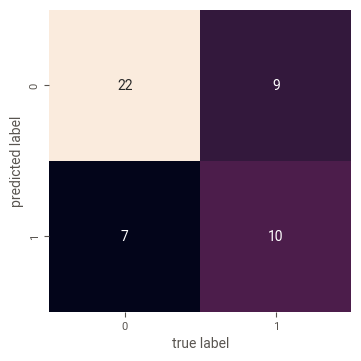

In [80]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [81]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_valid)
    error_rate.append(np.mean(pred_i != y_valid))

Text(0, 0.5, 'ERROR RATE')

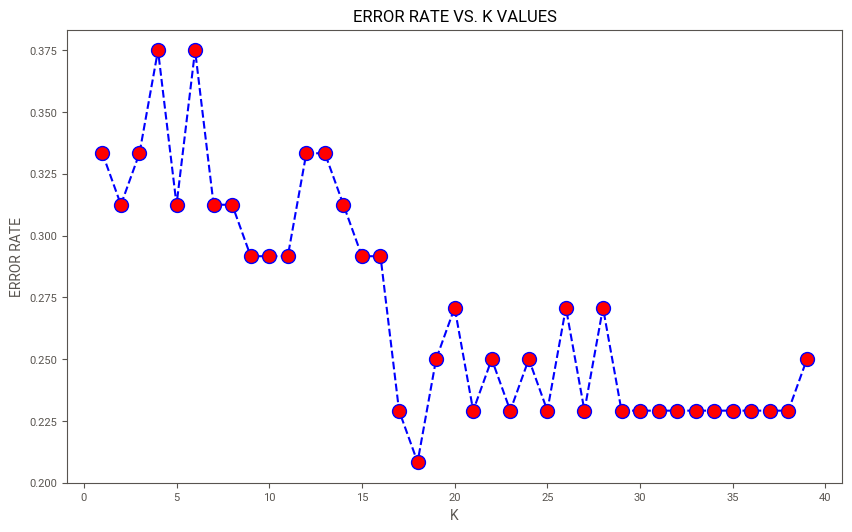

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('ERROR RATE VS. K VALUES')
plt.xlabel('K')
plt.ylabel('ERROR RATE')

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred = knn.predict(X_valid)
print('Score:\n',knn.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.7083333333333334 

Confusion Matrix:
 [[21 10]
 [ 4 13]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75        31
           1       0.57      0.76      0.65        17

    accuracy                           0.71        48
   macro avg       0.70      0.72      0.70        48
weighted avg       0.74      0.71      0.71        48



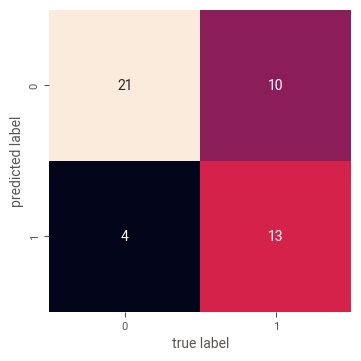

In [84]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt = DecisionTreeClassifier(random_state=101)

In [87]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [88]:
pred = dt.predict(X_valid)

In [89]:
print('Score:\n',dt.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.7291666666666666 

Confusion Matrix:
 [[24  7]
 [ 6 11]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.61      0.65      0.63        17

    accuracy                           0.73        48
   macro avg       0.71      0.71      0.71        48
weighted avg       0.73      0.73      0.73        48



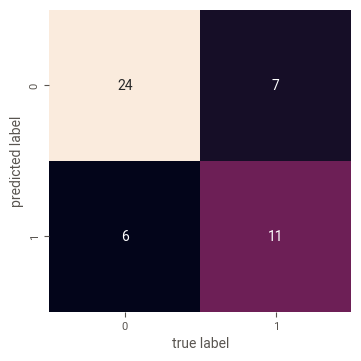

In [90]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [91]:
df_eval = pd.DataFrame({'Label':y_valid,
                        'Prediction': pred})
df_eval

Label  Prediction
114      1           1
440      0           1
143      1           0
226      0           0
268      0           1
278      0           0
138      0           1
31       0           0
91       0           0
406      0           0
100      1           1
128      0           1
315      1           1
104      1           0
212      0           0
169      1           0
190      1           1
260      0           0
438      0           0
391      0           0
418      1           1
133      0           0
317      0           0
334      1           1
117      0           0
238      0           0
454      1           1
213      0           0
130      0           0
346      0           0
349      0           0
180      0           0
210      0           1
419      0           1
17       1           0
184      1           0
351      0           0
478      0           0
408      1           1
13       0           1
211      1           1
38       1           1
72       1           1
2        0           0
387      0           0
179      0           0
308      1           0
412      0           0

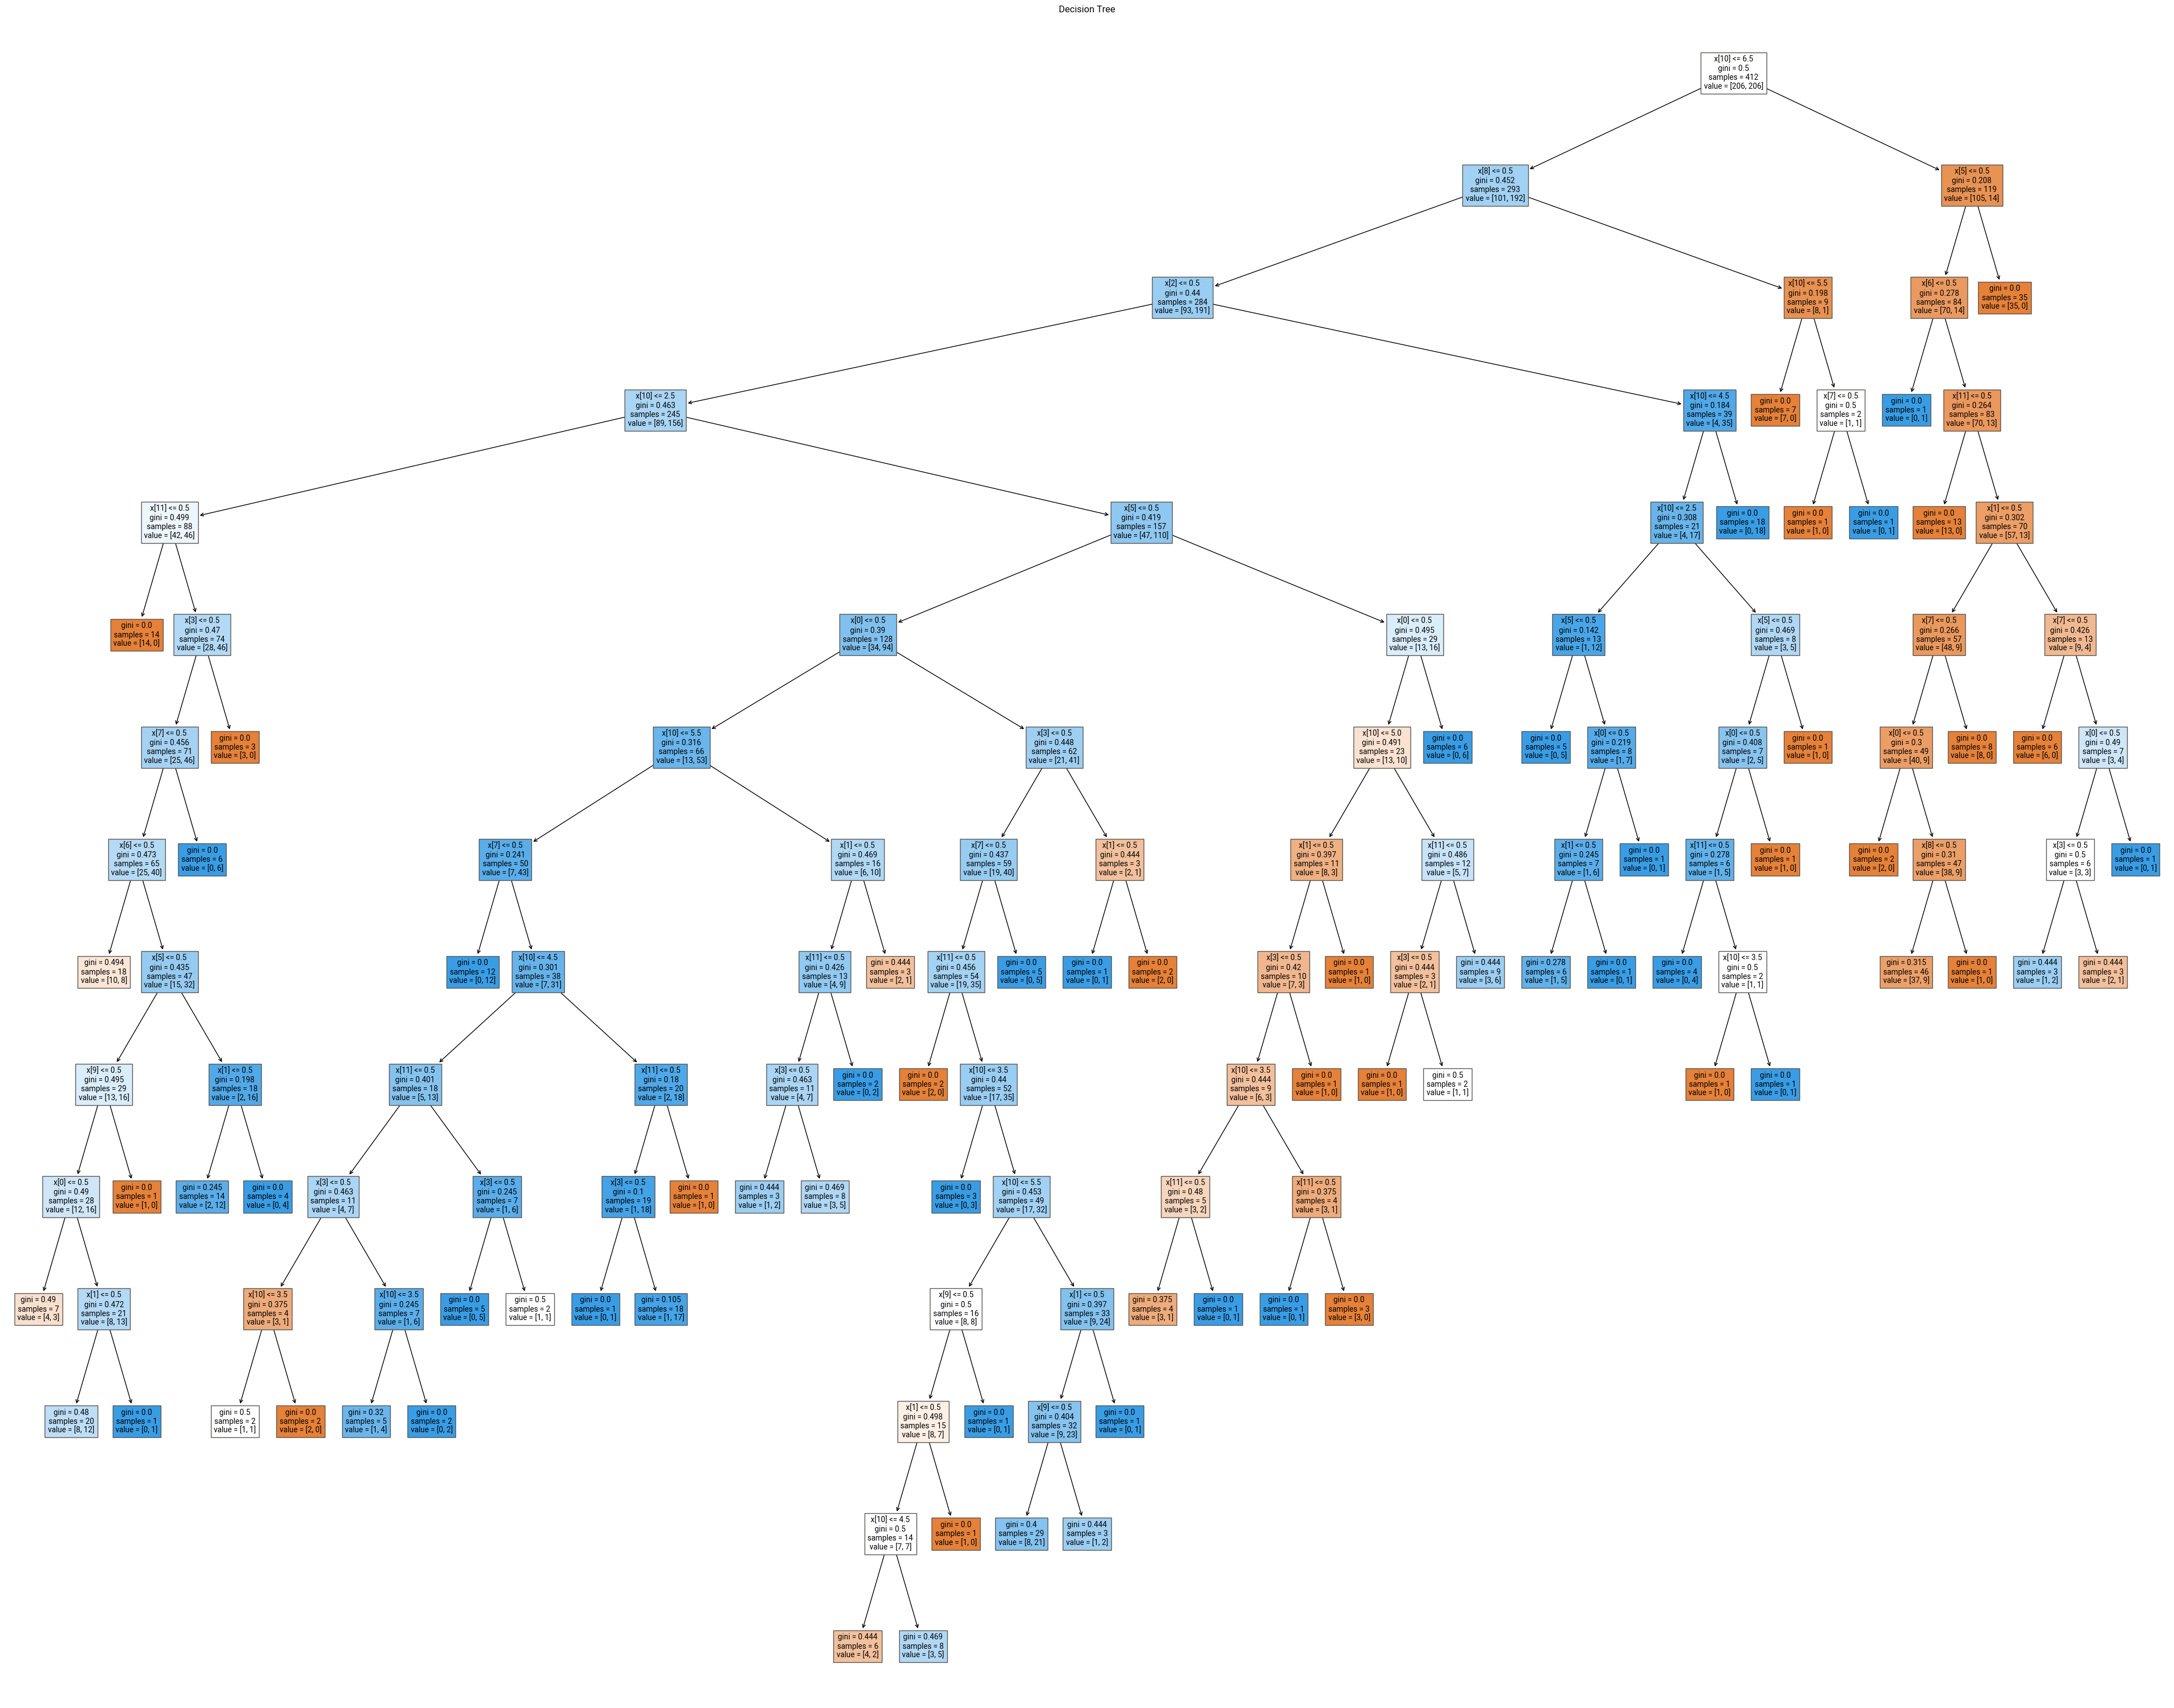

In [92]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,40))
plot_tree(dt, filled=True)
plt.title("Decision Tree")
plt.savefig('Decision Tree Visualize.jpg')

In [93]:
pd.DataFrame(data=dt.feature_importances_,index=X_train.columns,columns=['Value']).sort_values(by='Value',ascending=False)

Value
Flight Segment 1=Taxi              0.499536
91=1/121=0                         0.142917
Preconditions                      0.056012
Physical Environment               0.052905
Performance-Based Errors           0.052388
Technology Failure                 0.052089
Supervision                        0.044917
Violations                         0.036851
Judgment & Decision-Making Errors  0.029812
Acts                               0.023049
Organization                       0.009523
Inadequate Supervision             0.000000

### Hyper Parameter For Decision Tree

In [94]:
param_grid = {'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [95]:
from sklearn.model_selection import GridSearchCV
grid1 = GridSearchCV(DecisionTreeClassifier(random_state=101),param_grid,refit=True,verbose=3)
grid1.fit(X_train,y_train)
pred = grid1.predict(X_valid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.783 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.675 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.793 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.744 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.783 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.687 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.817 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.744 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.783 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

In [96]:
grid1.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [97]:
print('Score:\n',grid1.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.7708333333333334 

Confusion Matrix:
 [[24  7]
 [ 4 13]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81        31
           1       0.65      0.76      0.70        17

    accuracy                           0.77        48
   macro avg       0.75      0.77      0.76        48
weighted avg       0.78      0.77      0.77        48



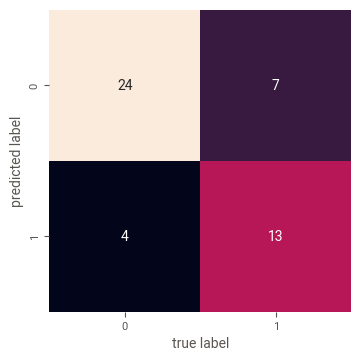

In [98]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(n_estimators=100,random_state=101)

In [101]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [102]:
pred_rf = rf.predict(X_valid)

In [103]:
df_eval = pd.DataFrame({'Label':y_valid,
                        'Prediction': pred_rf
                        })
df_eval

Label  Prediction
114      1           1
440      0           1
143      1           1
226      0           0
268      0           1
278      0           0
138      0           1
31       0           0
91       0           0
406      0           0
100      1           1
128      0           1
315      1           1
104      1           0
212      0           0
169      1           0
190      1           1
260      0           0
438      0           0
391      0           0
418      1           1
133      0           0
317      0           0
334      1           1
117      0           0
238      0           0
454      1           1
213      0           1
130      0           0
346      0           0
349      0           0
180      0           0
210      0           1
419      0           0
17       1           0
184      1           0
351      0           0
478      0           0
408      1           1
13       0           1
211      1           1
38       1           1
72       1           1
2        0           0
387      0           0
179      0           0
308      1           0
412      0           0

In [104]:
print('Score:\n',rf.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred_rf),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred_rf))

Score:
 0.75 

Confusion Matrix:
 [[24  7]
 [ 5 12]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.63      0.71      0.67        17

    accuracy                           0.75        48
   macro avg       0.73      0.74      0.73        48
weighted avg       0.76      0.75      0.75        48



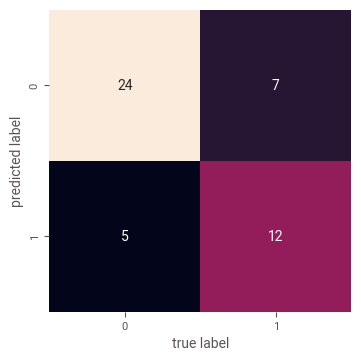

In [105]:
mat_T = confusion_matrix(y_valid,pred_rf)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [106]:
pd.DataFrame(data=rf.feature_importances_,index=X_train.columns,columns=['Value']).sort_values(by='Value',ascending=False)

Value
Flight Segment 1=Taxi              0.482800
91=1/121=0                         0.098460
Technology Failure                 0.075286
Preconditions                      0.063597
Performance-Based Errors           0.061734
Violations                         0.051583
Physical Environment               0.046682
Acts                               0.041104
Judgment & Decision-Making Errors  0.033210
Supervision                        0.016857
Organization                       0.014778
Inadequate Supervision             0.013907

## Support Vector Machine

In [107]:
from sklearn.svm import SVC

In [108]:
svm = SVC(random_state=101)

In [109]:
svm.fit(X_train,y_train)

SVC(random_state=101)

In [110]:
pred = svm.predict(X_valid)

In [111]:
df_eval = pd.DataFrame({'Label':y_valid,
                        'Prediction': pred
                        })
df_eval

Label  Prediction
114      1           1
440      0           1
143      1           0
226      0           0
268      0           1
278      0           0
138      0           1
31       0           1
91       0           0
406      0           0
100      1           1
128      0           1
315      1           1
104      1           1
212      0           0
169      1           1
190      1           1
260      0           0
438      0           0
391      0           0
418      1           1
133      0           0
317      0           0
334      1           1
117      0           0
238      0           0
454      1           1
213      0           1
130      0           0
346      0           0
349      0           1
180      0           0
210      0           1
419      0           0
17       1           1
184      1           1
351      0           0
478      0           0
408      1           1
13       0           1
211      1           1
38       1           1
72       1           1
2        0           0
387      0           0
179      0           1
308      1           1
412      0           0

In [112]:
print('Score:\n',svm.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.7708333333333334 

Confusion Matrix:
 [[21 10]
 [ 1 16]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.62      0.94      0.74        17

    accuracy                           0.77        48
   macro avg       0.78      0.81      0.77        48
weighted avg       0.83      0.77      0.78        48



In [113]:
df_eval[df_eval['Label'] != df_eval['Prediction']]

Label  Prediction
440      0           1
143      1           0
268      0           1
138      0           1
31       0           1
128      0           1
213      0           1
349      0           1
210      0           1
13       0           1
179      0           1

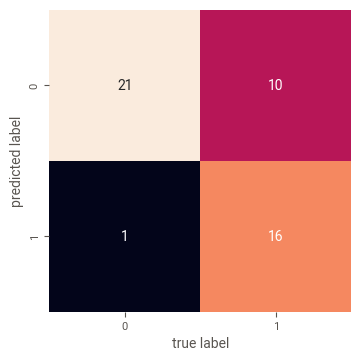

In [114]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Bernoulli Naive Bayes

In [115]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred = bnb.predict(X_valid)

In [116]:
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != pred).sum()))

Number of mislabeled points out of a total 48 points : 19


In [117]:
print('Score:\n',bnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.6041666666666666 

Confusion Matrix:
 [[22  9]
 [10  7]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        31
           1       0.44      0.41      0.42        17

    accuracy                           0.60        48
   macro avg       0.56      0.56      0.56        48
weighted avg       0.60      0.60      0.60        48



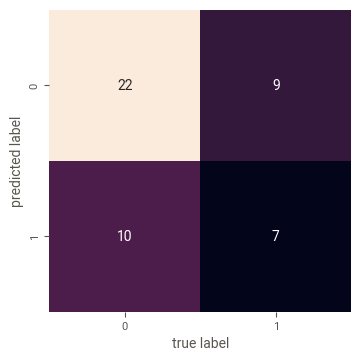

In [118]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Bagging Classifier Algorithm

In [119]:
from sklearn.ensemble import BaggingClassifier

In [120]:
bca = BaggingClassifier(SVC(random_state=101),random_state=101)

In [121]:
bca.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(random_state=101), random_state=101)

In [122]:
pred = bca.predict(X_valid)

In [123]:
print('Score:\n',bca.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.7708333333333334 

Confusion Matrix:
 [[21 10]
 [ 1 16]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.62      0.94      0.74        17

    accuracy                           0.77        48
   macro avg       0.78      0.81      0.77        48
weighted avg       0.83      0.77      0.78        48



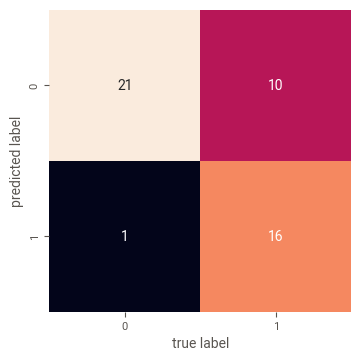

In [124]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Gradient Boosting Classifier Algorithm

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
gbc = GradientBoostingClassifier(random_state=101)

In [127]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=101)

In [128]:
pred = gbc.predict(X_valid)

In [129]:
print('Score:\n',gbc.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.7916666666666666 

Confusion Matrix:
 [[25  6]
 [ 4 13]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.68      0.76      0.72        17

    accuracy                           0.79        48
   macro avg       0.77      0.79      0.78        48
weighted avg       0.80      0.79      0.79        48



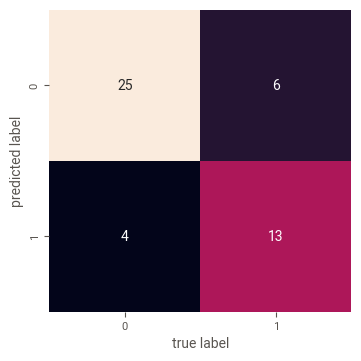

In [130]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## XGboost Classifier

In [131]:
from xgboost import XGBClassifier

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
xgb = XGBClassifier()

In [134]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [135]:
pred = xgb.predict(X_valid)

In [136]:
predictions = [round(value) for value in pred]

In [137]:
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

Accuracy: 77.083%


In [138]:
print('Score:\n',xgb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,pred))

Score:
 0.7708333333333334 

Confusion Matrix:
 [[25  6]
 [ 5 12]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.67      0.71      0.69        17

    accuracy                           0.77        48
   macro avg       0.75      0.76      0.75        48
weighted avg       0.77      0.77      0.77        48



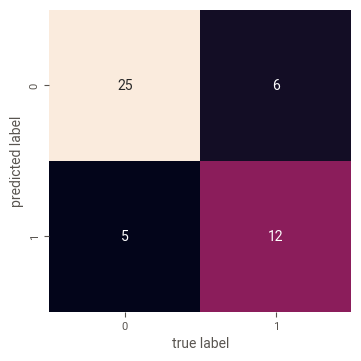

In [139]:
mat_T = confusion_matrix(y_valid,pred)
sns.heatmap(mat_T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Voting Classifier

In [140]:
from sklearn.ensemble import VotingClassifier

In [141]:
model_1 = SVC(random_state=101)
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_valid)

In [142]:
model_2 = GradientBoostingClassifier(random_state=101)
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_valid)

In [143]:
model_3 = RandomForestClassifier(n_estimators=100,random_state=101)
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_valid)

In [144]:
eclf = VotingClassifier(estimators=[('Support Vector Machine', model_1),
                                    ('Gradient Boosting', model_2),
                                    ('Random Forest', model_3)]
                        ,voting='hard')

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
for clf, label in zip([model_1, model_2, model_3, eclf], ['Support Vector Machine', 'Gradient Boosting' , 'Random Forest', 
                                                          'Ensemble']):

    scores = cross_val_score(clf, X_valid, y_valid, scoring='accuracy', cv=5)

    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.607 (+/- 0.108) [Support Vector Machine]
Accuracy: 0.631 (+/- 0.199) [Gradient Boosting]
Accuracy: 0.753 (+/- 0.147) [Random Forest]
Accuracy: 0.733 (+/- 0.159) [Ensemble]


# Test Models

In [147]:
X_trainValid = pd.concat([X_train,X_valid],axis=0)

In [148]:
X_trainValid

Performance-Based Errors  Judgment & Decision-Making Errors  Violations  \
0                           0                                  0           0   
1                           1                                  0           0   
2                           0                                  0           0   
3                           0                                  0           0   
4                           1                                  0           0   
..                        ...                                ...         ...   
2                           1                                  0           0   
387                         0                                  0           0   
179                         1                                  0           0   
308                         0                                  0           0   
412                         1                                  0           0   

     Physical Environment  Inadequate Supervision  Technology Failure  Acts  \
0                       0                       0                   1     0   
1                       0                       0                   0     1   
2                       0                       0                   1     0   
3                       1                       1                   0     0   
4                       0                       0                   0     1   
..                    ...                     ...                 ...   ...   
2                       0                       0                   0     1   
387                     0                       0                   1     0   
179                     0                       0                   0     1   
308                     0                       0                   0     0   
412                     0                       0                   0     1   

     Preconditions  Supervision  Organization  Flight Segment 1=Taxi  \
0                0            0             0                      2   
1                0            0             0                      6   
2                0            0             0                      2   
3                1            1             0                      5   
4                0            0             0                      6   
..             ...          ...           ...                    ...   
2                0            0             0                      7   
387              0            0             0                      7   
179              0            0             1                      2   
308              1            0             0                      4   
412              0            0             0                      7   

     91=1/121=0  
0             1  
1             1  
2             1  
3             0  
4             0  
..          ...  
2             1  
387           1  
179           1  
308           0  
412           0  

[460 rows x 12 columns]

In [149]:
y_trainValid = pd.concat([y_train,y_valid],axis=0)

In [150]:
y_trainValid

0      1
1      1
2      0
3      0
4      0
      ..
2      0
387    0
179    0
308    1
412    0
Name: Fatal or Serious, Length: 460, dtype: int64

## 0. Logistic Regression

In [151]:
model_0 = LogisticRegression(random_state=101)
model_0.fit(X_trainValid, y_trainValid)

LogisticRegression(random_state=101)

In [152]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_0, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.63043478 0.58695652 0.63043478 0.73188406 0.67391304]
0.651 accuracy with a standard deviation of 0.049


In [153]:
pred_0 = model_0.predict(X_test)

In [154]:
print('Score:\n',model_0.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_0),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_0))

Score:
 0.7604166666666666 

Confusion Matrix:
 [[56 14]
 [ 9 17]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        70
           1       0.55      0.65      0.60        26

    accuracy                           0.76        96
   macro avg       0.70      0.73      0.71        96
weighted avg       0.78      0.76      0.77        96



## 1. Random Forest Classifier

In [155]:
model_1 = RandomForestClassifier(n_estimators=100,random_state=101)
model_1.fit(X_trainValid, y_trainValid)

RandomForestClassifier(random_state=101)

In [156]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_1, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.73913043 0.77536232 0.7173913  0.73913043 0.7173913 ]
0.738 accuracy with a standard deviation of 0.021


In [157]:
pred_1 = model_1.predict(X_test)

In [158]:
print('Score:\n',model_1.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_1),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_1))

Score:
 0.8125 

Confusion Matrix:
 [[56 14]
 [ 4 22]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        70
           1       0.61      0.85      0.71        26

    accuracy                           0.81        96
   macro avg       0.77      0.82      0.79        96
weighted avg       0.85      0.81      0.82        96



## 2. XGboost Classifier

In [159]:
model_2 = XGBClassifier()
model_2.fit(X_trainValid, y_trainValid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [160]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_2, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.76086957 0.76086957 0.71014493 0.73913043 0.73188406]
0.741 accuracy with a standard deviation of 0.019


In [161]:
pred_2 = model_2.predict(X_test)

In [162]:
print('Score:\n',model_2.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_2),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_2))

Score:
 0.8020833333333334 

Confusion Matrix:
 [[56 14]
 [ 5 21]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85        70
           1       0.60      0.81      0.69        26

    accuracy                           0.80        96
   macro avg       0.76      0.80      0.77        96
weighted avg       0.83      0.80      0.81        96



## 3. Gradient Boosting Classifier

In [163]:
model_3 = GradientBoostingClassifier(random_state=101)
model_3.fit(X_trainValid, y_trainValid)

GradientBoostingClassifier(random_state=101)

In [164]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_3, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.73913043 0.77536232 0.71014493 0.73913043 0.73913043]
0.741 accuracy with a standard deviation of 0.021


In [165]:
pred_3 = model_3.predict(X_test)

In [166]:
print('Score:\n',model_3.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_3),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_3))

Score:
 0.8020833333333334 

Confusion Matrix:
 [[57 13]
 [ 6 20]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86        70
           1       0.61      0.77      0.68        26

    accuracy                           0.80        96
   macro avg       0.76      0.79      0.77        96
weighted avg       0.82      0.80      0.81        96



## 4. Bagging Classifier

In [167]:
model_4 = BaggingClassifier()
model_4.fit(X_trainValid, y_trainValid)

BaggingClassifier()

In [168]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_4, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.75362319 0.77536232 0.7173913  0.73913043 0.69565217]
0.736 accuracy with a standard deviation of 0.028


In [169]:
pred_4 = model_4.predict(X_test)

In [170]:
print('Score:\n',model_4.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_4),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_4))

Score:
 0.7395833333333334 

Confusion Matrix:
 [[54 16]
 [ 9 17]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81        70
           1       0.52      0.65      0.58        26

    accuracy                           0.74        96
   macro avg       0.69      0.71      0.69        96
weighted avg       0.76      0.74      0.75        96



## 5. Support Vector Machine

In [171]:
model_5 = SVC(random_state=101)
model_5.fit(X_trainValid, y_trainValid)

SVC(random_state=101)

In [172]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_5, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.77536232 0.75362319 0.7173913  0.70289855 0.74637681]
0.739 accuracy with a standard deviation of 0.026


In [173]:
pred_5 = model_5.predict(X_test)

In [174]:
print('Score:\n',model_5.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_5),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_5))

Score:
 0.6979166666666666 

Confusion Matrix:
 [[49 21]
 [ 8 18]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77        70
           1       0.46      0.69      0.55        26

    accuracy                           0.70        96
   macro avg       0.66      0.70      0.66        96
weighted avg       0.75      0.70      0.71        96



## 6. Decision Tree Classifier

In [175]:
model_6 = DecisionTreeClassifier(random_state=101)
model_6.fit(X_trainValid, y_trainValid)

DecisionTreeClassifier(random_state=101)

In [176]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_6, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.71014493 0.75362319 0.6884058  0.73188406 0.68115942]
0.713 accuracy with a standard deviation of 0.027


In [177]:
pred_6 = model_6.predict(X_test)

In [178]:
print('Score:\n',model_6.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_6),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_6))

Score:
 0.8020833333333334 

Confusion Matrix:
 [[56 14]
 [ 5 21]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85        70
           1       0.60      0.81      0.69        26

    accuracy                           0.80        96
   macro avg       0.76      0.80      0.77        96
weighted avg       0.83      0.80      0.81        96



## 7. Bernoulli Naive Bayes

In [179]:
model_7 = BernoulliNB()
model_7.fit(X_trainValid, y_trainValid)

BernoulliNB()

In [180]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_7, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.60869565 0.57246377 0.65942029 0.66666667 0.5942029 ]
0.620 accuracy with a standard deviation of 0.037


In [181]:
pred_7 = model_7.predict(X_test)

In [182]:
print('Score:\n',model_7.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_7),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_7))

Score:
 0.7708333333333334 

Confusion Matrix:
 [[59 11]
 [11 15]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        70
           1       0.58      0.58      0.58        26

    accuracy                           0.77        96
   macro avg       0.71      0.71      0.71        96
weighted avg       0.77      0.77      0.77        96



## 8. Voting Classifier

In [183]:
eclf = VotingClassifier(estimators=[('XGboost Classifier', model_2),
                                    ('Gradient Boosting Classifier', model_3),
                                    ('Random Forest Classifier', model_1)]
                        ,voting='hard')
eclf.fit(X_trainValid, y_trainValid)

VotingClassifier(estimators=[('XGboost Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=No...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('Gradient Boosting Classifier',
                              GradientBoostingClassifier(random_state=101)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(random_state=101))])

In [184]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_trainValid.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(eclf, X_trainValid, y_trainValid, cv=cv)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.75362319 0.7826087  0.7173913  0.75362319 0.74637681]
0.751 accuracy with a standard deviation of 0.021


In [185]:
pred_8 = eclf.predict(X_test)

In [186]:
print('Score:\n',eclf.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_8),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_8))

Score:
 0.8020833333333334 

Confusion Matrix:
 [[56 14]
 [ 5 21]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85        70
           1       0.60      0.81      0.69        26

    accuracy                           0.80        96
   macro avg       0.76      0.80      0.77        96
weighted avg       0.83      0.80      0.81        96



# Cross Validation: Evaluating Estimator Performance

In [187]:
X = pd.concat([X_train,X_valid,X_test],axis=0)

In [188]:
y = pd.concat([y_train,y_valid,y_test],axis=0)

In [189]:
from sklearn.model_selection import cross_val_score

In [190]:
from sklearn import metrics

In [191]:
from sklearn.model_selection import ShuffleSplit
n_samples = X_train.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
scores = cross_val_score(model_2, X, y, cv=cv)
scores

array([0.74251497, 0.73652695, 0.76047904, 0.76047904, 0.80838323])

In [192]:
for train_index, test_index in cv.split(X):
    print("%s %s" % (train_index, test_index))

[526 486  69 296 248  41  70 321 376 351  43  36 469 209 424 454 170 227
 143 384 429 527 293 265  53 165  74 231  51 132  44 552 267 470 350 302
 387 525 263 148 154 220 390 133 162 310 372 176 484  15 198  13 175 155
 359 230 335 313 160  17 317 283 153 278 425 475  86  73 483 168   7 389
 187 109 471 396 548 472 211  93 524 465 385 353 364 121 513 346 521 215
   9 482 324 164 152 360 391 323 234 169 474 426  45 334 112  90 126  78
 167 534 328 431 134 281 295  29 543 102 304 238 330 495 496 414 259 158
 210  20 289 345 206 347 123 333 554 439 119 442 377 251 252 401 135 433
 421 247 315 373 245 182 410 531 354 311 479  85 365 159 177 108 242 172
 115 298  35  37  34   1 382 367 542 101 150 487 306 458 332  11 553 223
  25 459 467 408 355  63 192 221 208 464 550 460 461  22  42 348   6 349
 398  88 322  50  80 258 380 193 145  54 232  66 538  26 151 185 445 122
  96 518 190 509  84 144 489 456  87 270 307 146  61 196  68  79 129 299
  67 423 125 492 166 292  97 301 219 547 485 309 41

In [193]:
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.762 accuracy with a standard deviation of 0.025


# Comparing Machine Learning Algorithms

In [194]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [195]:
MLA = [model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,eclf]

In [196]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_trainValid, y_trainValid).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_trainValid, y_trainValid), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'F1-Score'] = f1_score(y_test, predicted)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
MLA_compare

MLA used  Train Accuracy  Test Accuracy  Precission  \
1      RandomForestClassifier          0.8500         0.8125    0.611111   
2               XGBClassifier          0.8457         0.8021    0.600000   
3  GradientBoostingClassifier          0.8174         0.8021    0.606061   
4           BaggingClassifier          0.8457         0.8021    0.594595   
6      DecisionTreeClassifier          0.8500         0.8021    0.600000   
8            VotingClassifier          0.8478         0.8021    0.600000   
7                 BernoulliNB          0.6304         0.7708    0.576923   
0          LogisticRegression          0.6870         0.7604    0.548387   
5                         SVC          0.7717         0.6979    0.461538   

     Recall       AUC  F1-Score  
1  0.846154  0.823077  0.709677  
2  0.807692  0.803846  0.688525  
3  0.769231  0.791758  0.677966  
4  0.846154  0.815934  0.698413  
6  0.807692  0.803846  0.688525  
8  0.807692  0.803846  0.688525  
7  0.576923  0.709890  0.576923  
0  0.653846  0.726923  0.596491  
5  0.692308  0.696154  0.553846

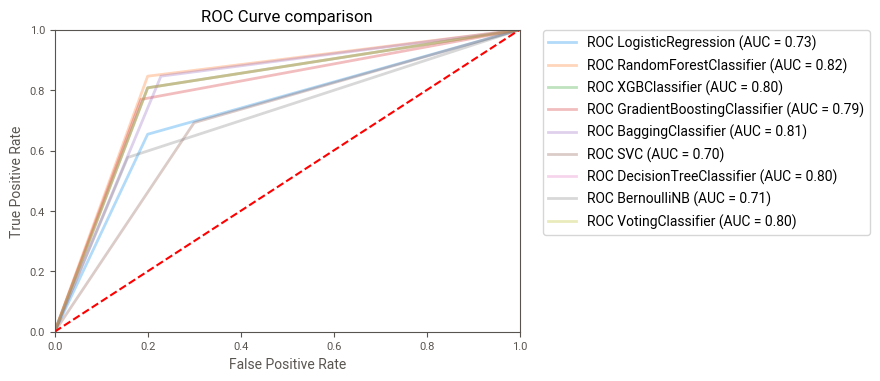

In [197]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_trainValid, y_trainValid).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

## Comparing Machine Learning Algorithms On Imbalance Dataset

In [198]:
X_trainValid = pd.concat([X_train_imbalance,X_valid],axis=0)

In [199]:
y_trainValid = pd.concat([y_train_imbalance,y_valid],axis=0)

In [200]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_trainValid, y_trainValid).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_trainValid, y_trainValid), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'F1-Score'] = f1_score(y_test, predicted)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
MLA_compare

MLA used  Train Accuracy  Test Accuracy  Precission  \
2               XGBClassifier          0.8478         0.8125    0.633333   
3  GradientBoostingClassifier          0.8031         0.8125    0.642857   
8            VotingClassifier          0.8504         0.8125    0.633333   
1      RandomForestClassifier          0.8530         0.8021    0.600000   
6      DecisionTreeClassifier          0.8530         0.7917    0.593750   
4           BaggingClassifier          0.8425         0.7812    0.571429   
7                 BernoulliNB          0.6772         0.7708    0.583333   
0          LogisticRegression          0.6772         0.7500    0.555556   
5                         SVC          0.7533         0.7396    0.517241   

     Recall       AUC  F1-Score  
2  0.730769  0.786813  0.678571  
3  0.692308  0.774725  0.666667  
8  0.730769  0.786813  0.678571  
1  0.807692  0.803846  0.688525  
6  0.730769  0.772527  0.655172  
4  0.769231  0.777473  0.655738  
7  0.538462  0.697802  0.560000  
0  0.384615  0.635165  0.454545  
5  0.576923  0.688462  0.545455

# Association Rule Mining: Apriori

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 478
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Performance-Based Errors           477 non-null    int64
 1   Judgment & Decision-Making Errors  477 non-null    int64
 2   Violations                         477 non-null    int64
 3   Physical Environment               477 non-null    int64
 4   Inadequate Supervision             477 non-null    int64
 5   Technology Failure                 477 non-null    int64
 6   Acts                               477 non-null    int64
 7   Preconditions                      477 non-null    int64
 8   Supervision                        477 non-null    int64
 9   Organization                       477 non-null    int64
 10  Fatal or Serious                   477 non-null    int64
 11  Flight Segment 1=Taxi              477 non-null    int64
 12  91=1/121=0            

In [202]:
data.drop(['Flight Segment 1=Taxi'],axis=1,inplace=True)

In [203]:
from mlxtend.frequent_patterns import apriori, association_rules

In [204]:
apriori = apriori(data, min_support = 0.2, use_colnames = True, verbose = 1)
apriori.sort_values(by='support',ascending=False).head(30)

Processing 9 combinations | Sampling itemset size 3


C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                      itemsets
5   0.681342                                  (91=1/121=0)
2   0.637317                                        (Acts)
10  0.515723                            (Acts, 91=1/121=0)
0   0.477987                    (Performance-Based Errors)
6   0.477987              (Acts, Performance-Based Errors)
7   0.387841        (Performance-Based Errors, 91=1/121=0)
12  0.387841  (Acts, Performance-Based Errors, 91=1/121=0)
4   0.356394                            (Fatal or Serious)
1   0.320755                          (Technology Failure)
3   0.253669                               (Preconditions)
11  0.245283                (Fatal or Serious, 91=1/121=0)
9   0.241090                      (Fatal or Serious, Acts)
8   0.218029              (Technology Failure, 91=1/121=0)
13  0.205451          (Fatal or Serious, Acts, 91=1/121=0)

In [205]:
rules = association_rules(apriori, metric = "support", min_threshold = 0.1)
rules.head(30)

antecedents  \
0                                   (Acts)   
1               (Performance-Based Errors)   
2               (Performance-Based Errors)   
3                             (91=1/121=0)   
4                     (Technology Failure)   
5                             (91=1/121=0)   
6                       (Fatal or Serious)   
7                                   (Acts)   
8                                   (Acts)   
9                             (91=1/121=0)   
10                      (Fatal or Serious)   
11                            (91=1/121=0)   
12        (Acts, Performance-Based Errors)   
13                      (Acts, 91=1/121=0)   
14  (Performance-Based Errors, 91=1/121=0)   
15                                  (Acts)   
16              (Performance-Based Errors)   
17                            (91=1/121=0)   
18                (Fatal or Serious, Acts)   
19          (Fatal or Serious, 91=1/121=0)   
20                      (Acts, 91=1/121=0)   
21                      (Fatal or Serious)   
22                                  (Acts)   
23                            (91=1/121=0)   

                               consequents  antecedent support  \
0               (Performance-Based Errors)            0.637317   
1                                   (Acts)            0.477987   
2                             (91=1/121=0)            0.477987   
3               (Performance-Based Errors)            0.681342   
4                             (91=1/121=0)            0.320755   
5                     (Technology Failure)            0.681342   
6                                   (Acts)            0.356394   
7                       (Fatal or Serious)            0.637317   
8                             (91=1/121=0)            0.637317   
9                                   (Acts)            0.681342   
10                            (91=1/121=0)            0.356394   
11                      (Fatal or Serious)            0.681342   
12                            (91=1/121=0)            0.477987   
13              (Performance-Based Errors)            0.515723   
14                                  (Acts)            0.387841   
15  (Performance-Based Errors, 91=1/121=0)            0.637317   
16                      (Acts, 91=1/121=0)            0.477987   
17        (Acts, Performance-Based Errors)            0.681342   
18                            (91=1/121=0)            0.241090   
19                                  (Acts)            0.245283   
20                      (Fatal or Serious)            0.515723   
21                      (Acts, 91=1/121=0)            0.356394   
22          (Fatal or Serious, 91=1/121=0)            0.637317   
23                (Fatal or Serious, Acts)            0.681342   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.477987  0.477987    0.750000  1.569079  0.173358    2.088050   
1             0.637317  0.477987    1.000000  1.569079  0.173358         inf   
2             0.681342  0.387841    0.811404  1.190891  0.062168    1.689630   
3             0.477987  0.387841    0.569231  1.190891  0.062168    1.211815   
4             0.681342  0.218029    0.679739  0.997647 -0.000514    0.994994   
5             0.320755  0.218029    0.320000  0.997647 -0.000514    0.998890   
6             0.637317  0.241090    0.676471  1.061436  0.013954    1.121022   
7             0.356394  0.241090    0.378289  1.061436  0.013954    1.035218   
8             0.681342  0.515723    0.809211  1.187672  0.081493    1.670209   
9             0.637317  0.515723    0.756923  1.187672  0.081493    1.492052   
10            0.681342  0.245283    0.688235  1.010118  0.002457    1.022111   
11            0.356394  0.245283    0.360000  1.010118  0.002457    1.005634   
12            0.681342  0.387841    0.811404  1.190891  0.062168    1.689630   
13            0.477987  0.387841    0.752033  1.573331  0.141331    2.105165   
14            0.637317  0.387

In [206]:
rules[rules['lift'] >= 1].sort_values(by='lift',ascending=False).head(30)

antecedents  \
16              (Performance-Based Errors)   
13                      (Acts, 91=1/121=0)   
1               (Performance-Based Errors)   
15                                  (Acts)   
14  (Performance-Based Errors, 91=1/121=0)   
0                                   (Acts)   
19          (Fatal or Serious, 91=1/121=0)   
22                                  (Acts)   
18                (Fatal or Serious, Acts)   
23                            (91=1/121=0)   
12        (Acts, Performance-Based Errors)   
3                             (91=1/121=0)   
2               (Performance-Based Errors)   
17                            (91=1/121=0)   
8                                   (Acts)   
9                             (91=1/121=0)   
20                      (Acts, 91=1/121=0)   
21                      (Fatal or Serious)   
7                                   (Acts)   
6                       (Fatal or Serious)   
10                      (Fatal or Serious)   
11                            (91=1/121=0)   

                               consequents  antecedent support  \
16                      (Acts, 91=1/121=0)            0.477987   
13              (Performance-Based Errors)            0.515723   
1                                   (Acts)            0.477987   
15  (Performance-Based Errors, 91=1/121=0)            0.637317   
14                                  (Acts)            0.387841   
0               (Performance-Based Errors)            0.637317   
19                                  (Acts)            0.245283   
22          (Fatal or Serious, 91=1/121=0)            0.637317   
18                            (91=1/121=0)            0.241090   
23                (Fatal or Serious, Acts)            0.681342   
12                            (91=1/121=0)            0.477987   
3               (Performance-Based Errors)            0.681342   
2                             (91=1/121=0)            0.477987   
17        (Acts, Performance-Based Errors)            0.681342   
8                             (91=1/121=0)            0.637317   
9                                   (Acts)            0.681342   
20                      (Fatal or Serious)            0.515723   
21                      (Acts, 91=1/121=0)            0.356394   
7                       (Fatal or Serious)            0.637317   
6                                   (Acts)            0.356394   
10                            (91=1/121=0)            0.356394   
11                      (Fatal or Serious)            0.681342   

    consequent support   support  confidence      lift  leverage  conviction  \
16            0.515723  0.387841    0.811404  1.573331  0.141331    2.567793   
13            0.477987  0.387841    0.752033  1.573331  0.141331    2.105165   
1             0.637317  0.477987    1.000000  1.569079  0.173358         inf   
15            0.387841  0.387841    0.608553  1.569079  0.140663    1.563836   
14            0.637317  0.387841    1.000000  1.569079  0.140663         inf   
0             0.477987  0.477987    0.750000  1.569079  0.173358    2.088050   
19            0.637317  0.205451    0.837607  1.314271  0.049128    2.233366   
22            0.245283  0.205451    0.322368  1.314271  0.049128    1.113757   
18            0.681342  0.205451    0.852174  1.250729  0.041186    2.155630   
23            0.241090  0.205451    0.301538  1.250729  0.041186    1.086545   
12            0.681342  0.387841    0.811404  1.190891  0.062168    1.689630   
3             0.477987  0.387841    0.569231  1.190891  0.062168    1.211815   
2             0.681342  0.387841    0.811404  1.190891  0.062168    1.689630   
17            0.477987  0.387841    0.569231  1.190891  0.062168    1.211815   
8             0.681342  0.515723    0.809211  1.187672  0.081493    1.670209   
9             0.637317  0.515723    0.756923  1.187672  0.081493    1.492052   
20            0.356394  0.205451    0.398374  1.117791  0.021650    1.069777   
21           

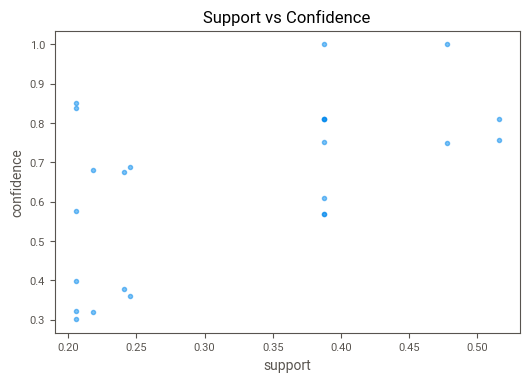

In [207]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

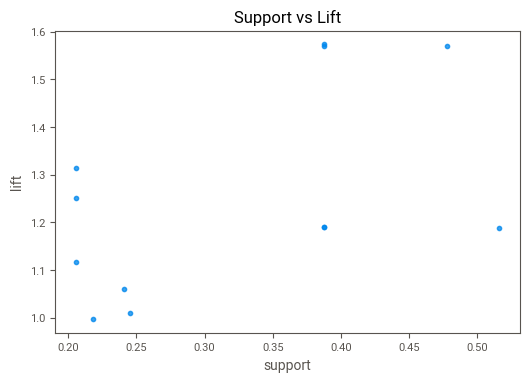

In [208]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

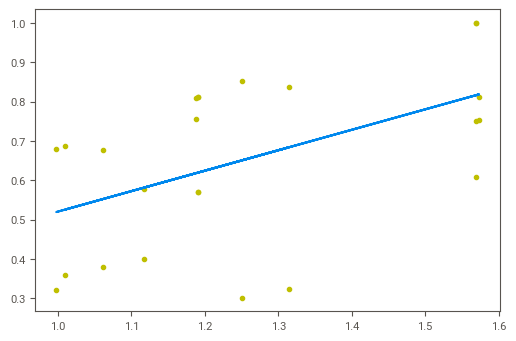

In [209]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# END =)